In [1]:
import twitter as tw
from TwitterSearch import *
import pandas as pd
import os, sys, time, operator, re, plotly, pyspark
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
#import required packages
#basics
import pandas as pd 
import numpy as np

#misc
import gc
import time
import warnings
from scipy.misc import imread
#viz
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
import matplotlib_venn as venn

#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords
import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from scipy import sparse
from nltk.tokenize import word_tokenize
# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer   

In [3]:
# spark args
SUBMIT_ARGS = "--packages com.datastax.spark:spark-cassandra-connector_2.11:2.0.1  pyspark-shell" 
SPARK_HOME = "/home/dsr/servers/spark"
os.environ["PYSPARK_SUBMIT_ARGS"] = SUBMIT_ARGS
os.environ["SPARK_HOME"] = SPARK_HOME
os.environ["PYSPARK_PYTHON"] = "/home/dsr/servers/jupyter/bin/anaconda3/bin/python"

#zamkniecie starego sparkcontextu
# sc = pyspark.SparkContext.getOrCreate()
# sc.stop()

#start spark
conf = pyspark.SparkConf()
conf.setAppName('MySpark')
conf.setMaster("spark://3-ds-lookalike-st:7077")
# conf.setMaster("spark://1-oset:7077")

conf.set("spark.cassandra.connection.port", '10042')
conf.set("spark.submit.deployMode",'cluster')
conf.setSparkHome(SPARK_HOME)

# conf.set("ClusterOne/spark.cassandra.connection.host", '4-oset')
conf.set("ClusterTwo/spark.cassandra.connection.host", '3-ds-lookalike-st')

sc = pyspark.SparkContext(conf=conf)
sqlContext = pyspark.sql.SQLContext(sc)

In [4]:
PD_TAB = sqlContext.read.format("org.apache.spark.sql.cassandra").options(cluster = "ClusterTwo",table="masterset", keyspace="look_alike_learning").load()
PD_TAB.show()

+---------------+--------------------+--------------------+--------+
|       username|          tweet_text|                time|language|
+---------------+--------------------+--------------------+--------+
|       Opestov2|завтрак в макдона...|Sat Apr 07 10:11:...|      ru|
|    davannayoga|It's FABULOUS FRI...|Fri Apr 06 12:46:...|      en|
|      misha5880|I liked a @YouTub...|Sat Apr 07 10:29:...|      lt|
|      misha5880|I liked a @YouTub...|Sat Apr 07 10:52:...|      en|
|    610SportsKC|https://t.co/a955...|Fri Apr 06 17:37:...|     und|
|          jok9r|https://t.co/UWtZ...|Fri Apr 06 17:00:...|     und|
|  LOLprincessss|RT @NCT_THAILAND:...|Fri Apr 06 12:38:...|     und|
|antonia06121999|https://t.co/YfyR...|Fri Apr 06 12:48:...|     und|
|antonia06121999|https://t.co/z7vc...|Fri Apr 06 12:48:...|     und|
|    HAKANKUTLAY|https://t.co/vRUG...|Fri Apr 06 17:34:...|     und|
|     ayombuddha|RT @lai_kuanlin92...|Sat Apr 07 10:40:...|      ko|
| StateStreetSRQ|If you like the e

In [5]:
tabelka = PD_TAB.toPandas()
PD_TAB.count()

169310

In [6]:
tabe = tabelka.copy()

In [7]:
nowe_cos = tabe.groupby(['language']).size().reset_index(name='count')
nowe_cos = nowe_cos.sort_values('count', ascending=False)
nowe_cos

,language,count
11,en,54929
58,und,47238
27,ja,12457
12,es,12386
31,ko,6499
54,th,6207
45,pt,6073
17,fr,3299
1,ar,2629
23,in,2469


In [8]:
nowe_cos = nowe_cos[0:10]
nowe_cos = nowe_cos.reset_index(inplace=False)
del nowe_cos['index']
nowe_cos

,language,count
0,en,54929
1,und,47238
2,ja,12457
3,es,12386
4,ko,6499
5,th,6207
6,pt,6073
7,fr,3299
8,ar,2629
9,in,2469


In [9]:
nowe_cos = nowe_cos.reset_index(inplace=False)

In [10]:
del nowe_cos['index']
nowe_cos

,language,count
0,en,54929
1,und,47238
2,ja,12457
3,es,12386
4,ko,6499
5,th,6207
6,pt,6073
7,fr,3299
8,ar,2629
9,in,2469


In [11]:
mapka = pd.DataFrame(nowe_cos, index = [0,1,2,3,4,5,6,7,8,9], columns=['language', 'count'])

In [12]:
mapka.columns = ['CODE', 'TWEETS']

In [95]:
mapka['COUNTRY'] = ['United States', 'LINK', 'Japan', 'Spain', 'Korea, South', 'Thailand', 'Portugal', 'France', 'United Arab Emirates', 'India']

In [96]:
mapka['CODE'] = ['USA', '---', "JPN", 'ESP', 'KOR', 'THA', 'PRT', 'FRA', 'ARE', 'IND']

In [97]:
mapka

,CODE,TWEETS,COUNTRY
0,USA,54929,United States
1,---,47238,LINK
2,JPN,12457,Japan
3,ESP,12386,Spain
4,KOR,6499,"Korea, South"
5,THA,6207,Thailand
6,PRT,6073,Portugal
7,FRA,3299,France
8,ARE,2629,United Arab Emirates
9,IND,2469,India


### Mapka

In [62]:
import plotly.plotly as py
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

In [57]:
del df['GDP (BILLIONS)']
df

,COUNTRY,CODE
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,American Samoa,ASM
4,Andorra,AND
5,Angola,AGO
6,Anguilla,AIA
7,Antigua and Barbuda,ATG
8,Argentina,ARG
9,Armenia,ARM


In [70]:
df.columns = ['COUNTRY', 'TWEETS', 'CODE']
df.loc[211]['TWEETS'] = 54983
df

,COUNTRY,TWEETS,CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND
5,Angola,131.40,AGO
6,Anguilla,0.18,AIA
7,Antigua and Barbuda,1.24,ATG
8,Argentina,536.20,ARG
9,Armenia,10.88,ARM


In [45]:
df2 = df.copy()

In [52]:
df2 = df.copy()
df2 = df2.loc[df2['COUNTRY']=='India']
df2

,COUNTRY,CODE
92,India,IND


In [72]:
data = [ dict(
        type = 'choropleth',
        locations = df['CODE'],
        z = df['TWEETS'],
        text = df['COUNTRY'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '$',
            title = 'No. Tweets'),
      ) ]

layout = dict(
    title = 'Map',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

## Najczęściej wsytępujące słowa w tweetach #top10;

In [17]:
df = tabe

In [18]:
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud ,STOPWORDS
eng_stopwords = set(stopwords.words("english"))

In [19]:
df['count_sent']=df["tweet_text"].apply(lambda x: len(re.findall("\n",str(x)))+1)
#Word count in each comment:
df['count_word']=df["tweet_text"].apply(lambda x: len(str(x).split()))
#Unique word count
df['count_unique_word']=df["tweet_text"].apply(lambda x: len(set(str(x).split())))
#Letter count
df['count_letters']=df["tweet_text"].apply(lambda x: len(str(x)))
#punctuation count
df["count_punctuations"] =df["tweet_text"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
#upper case words count
df["count_words_upper"] = df["tweet_text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
#title case words count
df["count_words_title"] = df["tweet_text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
#Number of stopwords
df["count_stopwords"] = df["tweet_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
#Average length of the words
df["mean_word_len"] = df["tweet_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [20]:
df

,username,tweet_text,time,language,count_sent,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len
0,Opestov2,завтрак в макдоналдсе: https://t.co/iT2dprfLL8...,Sat Apr 07 10:11:44 +0000 2018,ru,1,6,6,58,7,0,0,0,8.833333
1,davannayoga,It's FABULOUS FRIDAY with natalie perez today ...,Fri Apr 06 12:46:27 +0000 2018,en,1,16,15,114,8,2,1,6,6.187500
2,misha5880,I liked a @YouTube video https://t.co/vFRVeqDZ...,Sat Apr 07 10:29:01 +0000 2018,lt,1,8,8,62,6,1,2,2,6.875000
3,misha5880,I liked a @YouTube video https://t.co/zQQECTmh...,Sat Apr 07 10:52:01 +0000 2018,en,1,15,15,98,7,1,9,5,5.600000
4,610SportsKC,https://t.co/a955vVZYdU,Fri Apr 06 17:37:01 +0000 2018,und,1,1,1,23,5,0,0,0,23.000000
5,jok9r,https://t.co/UWtZ08uuPw,Fri Apr 06 17:00:35 +0000 2018,und,1,1,1,23,5,0,0,0,23.000000
6,LOLprincessss,RT @NCT_THAILAND: “NCT U (TAEYONG x TEN) FAN M...,Fri Apr 06 12:38:21 +0000 2018,und,2,17,17,140,15,9,1,1,7.235294
7,antonia06121999,https://t.co/YfyRNUc3qM,Fri Apr 06 12:48:42 +0000 2018,und,1,1,1,23,5,0,0,0,23.000000
8,antonia06121999,https://t.co/z7vcmf1wit,Fri Apr 06 12:48:35 +0000 2018,und,1,1,1,23,5,0,0,0,23.000000
9,HAKANKUTLAY,https://t.co/vRUGlfQvEv,Fri Apr 06 17:34:26 +0000 2018,und,1,1,1,23,5,0,0,0,23.000000


In [21]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns

In [22]:
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

def top_feats_in_doc(Xtr, features, row_id, top_n=25):
    ''' Top tfidf features in specific document (matrix row) '''
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

def top_mean_feats(Xtr, features, grp_ids, min_tfidf=0.1, top_n=25):
    ''' Return the top n features that on average are most important amongst documents in rows
        indentified by indices in grp_ids. '''
    
    D = Xtr[grp_ids].toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

# modified for multilabel milticlass
def top_feats_by_class(Xtr, features, min_tfidf=0.1, top_n=20):
    ''' Return a list of dfs, where each df holds top_n features and their mean tfidf value
        calculated across documents with the same class label. '''
    dfs = []
    cols=train_tags.columns
    for col in cols:
        ids = train_tags.index[train_tags[col]==1]
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np

#misc
import gc
import time
import warnings
from scipy.misc import imread

In [24]:
corpus=df.tweet_text

In [25]:
APPO = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not",
"tryin'":"trying"
}

In [26]:
def clean(comment):
    """
    This function receives comments and returns clean word-list
    """
    #Convert to lower case , so that Hi and hi are the same
    comment=comment.lower()
    #remove \n
    comment=re.sub("\\n","",comment)
    # remove leaky elements like ip,user
    comment=re.sub("\d{1,3}.\d{1,3}.\d{1,3}.\d{1,3}","",comment)
    #removing usernames
    comment=re.sub("\[\[.*\]","",comment)
    
    #Split the sentences into words
    words=tokenizer.tokenize(comment)
    
    # (')aphostophe  replacement (ie)   you're --> you are  
    # ( basic dictionary lookup : master dictionary present in a hidden block of code)
    words=[APPO[word] if word in APPO else word for word in words]
    words=[lem.lemmatize(word, "v") for word in words]
    words = [w for w in words if not w in eng_stopwords]
    
    clean_sent=" ".join(words)
    # remove any non alphanum,digit character
    #clean_sent=re.sub("\W+"," ",clean_sent)
    #clean_sent=re.sub("  "," ",clean_sent)
    return(clean_sent)

In [27]:
#settings
start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")
eng_stopwords = set(stopwords.words("english"))
warnings.filterwarnings("ignore")

lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

import matplotlib.gridspec as gridspec 
%matplotlib inline

In [28]:
clean_corpus=corpus.apply(lambda x :clean(x))


In [29]:
start_unigrams=time.time()
tfv = TfidfVectorizer(min_df=256,  max_features=1000000, 
            strip_accents='unicode', analyzer='word',ngram_range=(1,1),
            use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')
tfv.fit(clean_corpus)
features = np.array(tfv.get_feature_names())


In [30]:
train_unigrams =  tfv.transform(clean_corpus.iloc[:df.shape[0]])


In [31]:
train_feats=df.iloc[0:len(df),]
train_tags=df.iloc[:,2:]


In [32]:
train_feats['count_unique_word'].loc[train_feats['count_unique_word']>200] = 200
temp_df = pd.melt(train_feats, value_vars=['count_word', 'count_unique_word'], id_vars='clean')

In [33]:
df['word_unique_percent']=df['count_unique_word']*100/df['count_word']
#derived features
#Punct percent in each comment:
df['punct_percent']=df['count_punctuations']*100/df['count_word']

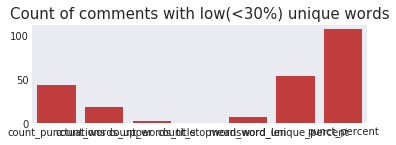

In [34]:
spammers=df[df['word_unique_percent']<30]
x=spammers.iloc[:,-7:].sum()
plt.subplot2grid((2,2),(1,0),colspan=50)
plt.title("Count of comments with low(<30%) unique words",fontsize=15)
ax=sns.barplot(x=x.index, y=x.values,color=color[3])


In [35]:
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

In [36]:
tfidf_top_n_per_lass=top_feats_by_class(train_unigrams,features)

In [37]:
tfidf_top_n_per_lass

[       feature  tfidf
 0           神回    NaN
 1         hate    NaN
 2          hit    NaN
 3         hide    NaN
 4         help    NaN
 5      heinous    NaN
 6         hear    NaN
 7         head    NaN
 8         hash    NaN
 9        group    NaN
 10       happy    NaN
 11      happen    NaN
 12          ha    NaN
 13  h7mijgwvre    NaN
 14  h6rkrzty2v    NaN
 15         guy    NaN
 16        home    NaN
 17        hope    NaN
 18   hospitals    NaN
 19        hour    NaN,        feature  tfidf
 0           神回    NaN
 1         hate    NaN
 2          hit    NaN
 3         hide    NaN
 4         help    NaN
 5      heinous    NaN
 6         hear    NaN
 7         head    NaN
 8         hash    NaN
 9        group    NaN
 10       happy    NaN
 11      happen    NaN
 12          ha    NaN
 13  h7mijgwvre    NaN
 14  h6rkrzty2v    NaN
 15         guy    NaN
 16        home    NaN
 17        hope    NaN
 18   hospitals    NaN
 19        hour    NaN,      feature     tfidf
 0      ht

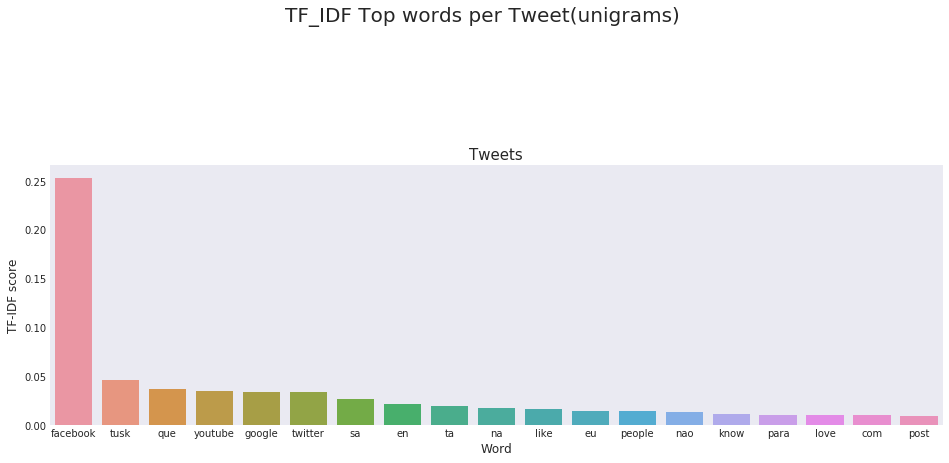

In [38]:
plt.figure(figsize=(16,22))
plt.suptitle("TF_IDF Top words per Tweet(unigrams)",fontsize=20)
gridspec.GridSpec(4,2)
# plt.subplot2grid((4,2),(0,0))
# sns.barplot(tfidf_top_n_per_lass[0].feature.iloc[0:9],tfidf_top_n_per_lass[0].tfidf.iloc[0:9],color=color[0])
# plt.title("Tweets",fontsize=15)
# plt.xlabel('Word', fontsize=12)
# plt.ylabel('TF-IDF score', fontsize=12)


# plt.subplot2grid((4,2),(0,1))
# sns.barplot(tfidf_top_n_per_lass[1].feature.iloc[0:9],tfidf_top_n_per_lass[1].tfidf.iloc[0:9],color=color[1])
# plt.title("class : Severe toxic",fontsize=15)
# plt.xlabel('Word', fontsize=12)
# plt.ylabel('TF-IDF score', fontsize=12)


# plt.subplot2grid((4,2),(1,0))
# sns.barplot(tfidf_top_n_per_lass[2].feature.iloc[0:9],tfidf_top_n_per_lass[2].tfidf.iloc[0:9],color=color[2])
# plt.title("class : Obscene",fontsize=15)
# plt.xlabel('Word', fontsize=12)
# plt.ylabel('TF-IDF score', fontsize=12)


# plt.subplot2grid((4,2),(1,1))
# sns.barplot(tfidf_top_n_per_lass[3].feature.iloc[0:9],tfidf_top_n_per_lass[3].tfidf.iloc[0:9],color=color[3])
# plt.title("class : Threat",fontsize=15)
# plt.xlabel('Word', fontsize=12)
# plt.ylabel('TF-IDF score', fontsize=12)


# plt.subplot2grid((4,2),(2,0))
# sns.barplot(tfidf_top_n_per_lass[4].feature.iloc[0:9],tfidf_top_n_per_lass[4].tfidf.iloc[0:9],color=color[4])
# plt.title("class : Insult",fontsize=15)
# plt.xlabel('Word', fontsize=12)
# plt.ylabel('TF-IDF score', fontsize=12)


# plt.subplot2grid((4,2),(2,1))
# sns.barplot(tfidf_top_n_per_lass[5].feature.iloc[0:9],tfidf_top_n_per_lass[5].tfidf.iloc[0:9],color=color[5])
# plt.title("class : Identity hate",fontsize=15)
# plt.xlabel('Word', fontsize=12)
# plt.ylabel('TF-IDF score', fontsize=12)


plt.subplot2grid((4,2),(0,0),colspan=2)
sns.barplot(tfidf_top_n_per_lass[6].feature.iloc[0:19],tfidf_top_n_per_lass[6].tfidf.iloc[0:19])
plt.title("Tweets",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)

plt.show()

### odczyt RT:

In [91]:
i=0

In [102]:
columns = ['username','tweet_text', 'time', 'language']
tabelka = pd.DataFrame(columns=columns)

In [93]:
try:
    tso = TwitterSearchOrder() # create a TwitterSearchOrder object
    tso.set_keywords(['google', 'youtube'], or_operator=True)#,['google']) # let's define all words we would like to have a look for
    tso.add_keyword(['google', 'youtube'], or_operator=True)
    #tso.set_language('pl') # we want to see German tweets only
    tso.set_include_entities(False) # and don't give us all those entity information
    # it's about time to create a TwitterSearch object with our secret tokens
    ts = TwitterSearch(
        consumer_key = 'WMIZHIKwq3pxCeNlRZWIxEmLj',
        consumer_secret = 'ETfyTs28mGYypj9X0d7PeVBtLVUCA04G0QH3SM9lVcZ8d6doxr',
        access_token = '981943339686744065-174h6G2ZVXPPyNA4Yv4zIyMFaUlEXkR',
        access_token_secret = 'yGROxnMt2ACBKpaglApUSRUlvsbGwKEpViSVcFoW81G7u'
     )

     # this is where the fun actually starts :)
    for tweet in ts.search_tweets_iterable(tso):
        print(( tweet['user']['screen_name'], tweet['text'], tweet['created_at'] , tweet['lang']))
        a = (tweet['user']['screen_name'], tweet['text'], tweet['created_at'] , tweet['lang'])
        token = list(a)
        A = {'username':token[0], 'tweet_text':token[1], 'time':token[2], 'language':token[3]}
        tabelka = tabelka.append(A, ignore_index=True)
        le = len(tabelka)
        if(le==500):
            
            print("teraz"+str(t4-t3))
            profilki = tabelka.groupby(['time']).size().reset_index(name='count')
            keyword='facebook'
            trace0 = go.Bar(
                x=profilki['time'],
                y=profilki['count'],
                name='Primary Product',
                marker=dict(
                    color='rgb(49,130,189)'
                )
            )


            data = [trace0]
            layout = go.Layout(
                xaxis=dict(tickangle=-45),
                title='Liczba tweetów z keywordem '+str(keyword),
                barmode='group',
            )

    #             fig = go.Figure(data=data, layout=layout)
    #             py.iplot(fig, filename='angled-text-bar')

            figure=go.Figure(data=data,layout=layout)
            py.image.save_as(figure, filename='output/Grupa_'+str(i)+'.png')
            i=i+1
            columns = ['username','tweet_text', 'time', 'language']
            tabelka = pd.DataFrame(columns=columns)
except TwitterSearchException as e: # take care of all those ugly errors if there are some
    print(e)

('zyonrap_game', 'Me ha gustado un vídeo de @YouTube (https://t.co/ABYu0lYdJH - LA MAGIA DE DEMBELE ME CLASIFICA PARA FUT CHAMPIONS!!).', 'Sat Apr 07 12:17:14 +0000 2018', 'es')
('alloveryoongi', 'RT @bts_bighit: [#방탄밤] 아미와 함께 해서 더 즐거웠던 #고민보다Go 사전 녹화! #마이크를뚫고나오는아미의응원소리 #탕진잼탕진잼탕진잼 #긋냥긋냥\n(https://t.co/idEsfo8MLy)', 'Sat Apr 07 12:17:14 +0000 2018', 'ko')
('SidRajput_muzik', 'I added a video to a @YouTube playlist https://t.co/Wds8qMxImR Phir Bhi Tumko Chaahunga (Unplugged Cover) Sid Rajput l Half Girlfriend', 'Sat Apr 07 12:17:14 +0000 2018', 'en')
('tatapopo3', 'RT @DJ_Shacho: 【初めてこういう動画出した。\n今まで隠してた事とかいっぱい話したから暇な人は見てー】\n\n実は借金何千万もあるのよーん。笑\n\nhttps://t.co/h1nOpJTWUQ https://t.co/vEqz5EEjJK', 'Sat Apr 07 12:17:14 +0000 2018', 'ja')
('EMEChandigarh', 'I added a video to a @YouTube playlist https://t.co/fm9muS2zXA desc bookstore', 'Sat Apr 07 12:17:14 +0000 2018', 'en')
('Silvveron', 'Me ha gustado un vídeo de @YouTube (https://t.co/7tbHNpg1E4 - Luciano Pereyra - Que Suerte Tiene El).', '

('uramineb', 'RT @tomatomato3312: #4月なのでフォロワーさんに自己紹介しようぜ \nYouTubeにてゲーム実況をしてます！\n主にフリーゲーム中心にコラボ実況はオンラインゲーム、マインクラフトなど幅広く実況してます(^-^)\nコラボ実況はOP等も作っていますので是非ご視聴、…', 'Sat Apr 07 12:17:12 +0000 2018', 'ja')
('HAK1M_B', 'RT @PyrocynicalTV: YouTube: "create a unique and timeless username"\n\nMe: https://t.co/yZrOINq9ad', 'Sat Apr 07 12:17:12 +0000 2018', 'en')
('skr_03288', 'RT @sankoiti_offici: 【大切なお話】さんこいちが新しく生まれ変わります。\n\n🌟続きはYouTube↓↓↓🌟\nhttps://t.co/YZUCaGUP8T\n\nチャンネル登録もよろしく🙏 https://t.co/1mA0Lxiwdn', 'Sat Apr 07 12:17:12 +0000 2018', 'ja')
('amazingtoludada', 'I liked a @YouTube video https://t.co/uVCJmM4Euf Ask ErionP #1 [OPEN]', 'Sat Apr 07 12:17:12 +0000 2018', 'en')
('SkakterxTW', 'Me ha gustado un vídeo de @YouTube (https://t.co/8wud3ooezF - FANDUB (Doblaje Goofy, Ralph El Demoledor, Rey Julien) con Mario Filio', 'Sat Apr 07 12:17:12 +0000 2018', 'es')
('MikiT84479143', 'RT @hiropapa357: . \nそばにいたい時に\n\nいられないもどかしさ\n\n誰よりもキミに会いたいのに…\n\nどんなに離れていても\n\n見守ってる\n\n約束だよ\n\n君の元気な笑顔 \n\n俺に見せると

('AnimalPetFans', 'Casinha de palitos https://t.co/49mmXImSPt', 'Sat Apr 07 12:17:10 +0000 2018', 'pt')
('Crackityjones1', 'https://t.co/PTK0FLeD3z  Part 2 of the @hughiefury documentary by @bigvern44 a very enjoyable watch with interviews… https://t.co/OT5JZyg9LP', 'Sat Apr 07 12:17:10 +0000 2018', 'en')
('nea_rauru', '#PS4share\nhttps://t.co/lkUStm8yuC', 'Sat Apr 07 12:17:10 +0000 2018', 'und')
('anuradhaaction2', 'Latest Cheating Playing Cards iPhone Cover Device in West Bengal-9999994242: https://t.co/9svYCIOaqg via @YouTube', 'Sat Apr 07 12:17:10 +0000 2018', 'en')
('tiandavis', "RT @Pinboard: Here's the useful FEC search page if you want to find out what Google (or other tech companies) gave to your disgraced, misog…", 'Sat Apr 07 12:17:10 +0000 2018', 'en')
('bicus_dicus', '@MarkDice yes, your videos on YouTube I have to hunt down as well', 'Sat Apr 07 12:17:10 +0000 2018', 'en')
('jay_em_jay', 'RT @justcallmeBABA: Haiii guiseee welcome back to my YouTube channelll https://t.co/

('JuninhoVlogs4', 'Gostei de um vídeo @YouTube https://t.co/FWjPPqGhS2 Dybala ⚽ Best Fights &amp; Angry Moments \\ Migliori Risse ⚽ Part 3 ⚽ 1080i', 'Sat Apr 07 12:17:09 +0000 2018', 'pt')
('NattayaMahawong', 'RT @mooratty15: เมื่อนุชกอดพิคคี้เสร็จ แล้วบอกพ่อหมีว่า ส่งรหัสเอารถ\n\nเอิ่มม เอ่ออ พิคคี้พูดไม่ออกโลย เดดแอร์หนักมาก 555 \n\nพ่อหมีบอก เหมือน…', 'Sat Apr 07 12:17:09 +0000 2018', 'th')
('eunwoo_HQ', 'RT @dia_moond: 아 진짜 저 지금 이 영상 보고 살짝 울고있거든요ㅜㅠㅜㅜ 꼭보세요 진짜뤀ㅋㅋㅋㅋㅋ큐ㅜㅡㅜㅜ어벤져스가 1980년에 나왔다면 이라는 영상인데ㅋㅋㅋㅋㅋㅋ복수자들 보랏괴수의 침공ㅋㅋㅋㅋㅋㅋ흐ㅠㅜㅜㅜ\nhttps://t.co/lgJC…', 'Sat Apr 07 12:17:09 +0000 2018', 'ko')
('janeguti14', 'RT @PattyPoleo: JUSTICIA EN VENEZUELA | PARTE 3 | AGÁRRATE | FACTORES DE PODER: https://t.co/rxlFU7GWOF a través de @YouTube', 'Sat Apr 07 12:17:09 +0000 2018', 'es')
('MuseeDuSporting', 'RT @MouvAzuretOr: Sporting Club Toulon - US Colomiers Foot, le Direct Live Audio revient sur RazCast Tv dès 18h : https://t.co/8OLhceQTQr h…', 'Sat Apr 07 12:17:09 +0000 2018', 'fr')
('Milanchester_',

('JANE_MOOD', 'RT @BabyLoogwa: MV อังศุมาลิน (คู่กรรม) - ณเดชน์ [Official HD] https://t.co/y4ejcZY4aA ข้อมูลจาก @YouTube : ต้องทำงานเรื่องนี้ พอดูแล้วก็อิ…', 'Sat Apr 07 12:17:07 +0000 2018', 'th')
('tk_timy', 'RT @TODAK_JB: 건반 위 하이에나 노래 스포! 딱 한줄!! https://t.co/y6sZ2sd31z  #재범 #JB #GOT7 #갓세븐 #팬사인회 180407 https://t.co/KjZNs6Qr9i', 'Sat Apr 07 12:17:07 +0000 2018', 'ko')
('uramineb', 'RT @gdgd_nyoro: 今日は2本動画うｐです。 https://t.co/s5W3F1HbMj', 'Sat Apr 07 12:17:07 +0000 2018', 'ja')
('santicampos40', 'RT @Del40al1_es: Muy grandes, muy buenas! @Aitana_ot2017 y @AnaG_ot2017 logran en @Los40 el primer gran número 1 para LO MALO!!! Así lo han…', 'Sat Apr 07 12:17:07 +0000 2018', 'es')
('santosd52908892', 'RT @Joeytrill813: "Money Talk!" 📞💸✨\n🎬: @danielcruzing \n\nOfficial Premiere 🍿🎞\n- https://t.co/euVfcOW6nj📍\n\nVia - @ELEVATOR_ \nhttps://t.co/3o2…', 'Sat Apr 07 12:17:07 +0000 2018', 'en')
('DannySteyne', 'I added a video to a @YouTube playlist https://t.co/VjDioCuVy1 Venture 9: What A Beautifu

('parvidakis', 'https://t.co/vpmH5fMlpK https://t.co/xBGgvgvcds', 'Sat Apr 07 12:17:05 +0000 2018', 'und')
('lef', 'RT @tagomoris: 「OK Google 宇宙戦艦ヤマトをかけて」っていったら「佐々木勲をかけます」と反応し、実際にかかったのは残酷な天使のテーゼだった。AIの時代は遠いな。', 'Sat Apr 07 12:17:05 +0000 2018', 'ja')
('JPartizana', 'N.Williams Goss is on FIRE! ⚫⚪🔥🏀🏆: https://t.co/ybl9QcR7DG преко @YouTube', 'Sat Apr 07 12:17:05 +0000 2018', 'ro')
('GraGiannuzzi', 'Mi è piaciuto un video di @YouTube: https://t.co/P41VS9dcEL TORTA CON UOVA DI PASQUA frulli tutto e in 1 minuto è pronta!', 'Sat Apr 07 12:17:05 +0000 2018', 'it')
('dinesh47370282', 'RT @DVVEnts: Few hours to go for #BharatBahirangaSabha \n\nLIVE streaming on\n\nhttps://t.co/ySfIcHsXoY\n\nhttps://t.co/snIMBU403f https://t.co/y…', 'Sat Apr 07 12:17:05 +0000 2018', 'en')
('Eventbar_Eden', 'RT @uchu______: 【チョロっと予告編】\n模擬面接やってみました！👩\u200d💼\n@eraitencho \n@Eventbar_Eden \n4/10本番です！みんな来てね！\n続きはYouTubeへ↓↓\nhttps://t.co/p21dLbhcHi https://t.co…', 'Sat Apr 07 12:17:05 +0000 2018', 'ja')
('anuradhaact

('amine19650', 'J\'aime une vidéo @YouTube\xa0: "TOUS LES "MODES TEMPORAIRES" DISPONIBLES ! (Fortnite Battle Royale)" à l\'adresse', 'Sat Apr 07 12:17:03 +0000 2018', 'fr')
('Jha41Deepak', 'Wwe Greates wrestlemania moments &amp; matches of all times: https://t.co/HhblWVyeIi via @YouTube', 'Sat Apr 07 12:17:03 +0000 2018', 'en')
('hfdincidents', 'Check Patient - L084 - Northborough Dr - 07:14 - https://t.co/j9BJnoWfzo', 'Sat Apr 07 12:17:03 +0000 2018', 'en')
('thamerslama7', 'سبب عدم وجود الجزء الثالث لمسلسل LA casa de papel: https://t.co/jYvyTKyE5R via @YouTube', 'Sat Apr 07 12:17:03 +0000 2018', 'ar')
('mitsukinnnn1', 'この立命のチーム本当に大好き!\n\nhttps://t.co/Mang03yv9Z', 'Sat Apr 07 12:17:03 +0000 2018', 'ja')
('cc8400', '《大國外交》\n是為全面展現中國外交領域的新思想新戰略新實踐新成就，\n由中央組織拍攝的6集大型政論專題片。\nhttps://t.co/KZEYjlbQ9s https://t.co/KZEYjlbQ9s', 'Sat Apr 07 12:17:03 +0000 2018', 'zh')
('Yassine7101', 'J\'aime une vidéo @YouTube\xa0: "LE RETOUR DU RAMADAN AVEC KENNY" à l\'adresse https://t.co/o7OGvKYd1y.', 'Sat 

('Video_Game_OST', 'EVE Online OST ● Ride Out the Storm - Ambient Music (MMORPG Video Game Music Soundtrack): https://t.co/nEpNDtBbHA via @YouTube', 'Sat Apr 07 12:17:01 +0000 2018', 'en')
('Video_Game_OST', 'WildStar OST ● A Cold Night in Thayd (MMORPG Video Game Music Soundtrack): https://t.co/PRjGBIiDxU via @YouTube', 'Sat Apr 07 12:17:01 +0000 2018', 'en')
('MarketingEMG', 'Agustin Llumbart entrevista a Locutores de Super Q Por Rianse TV: https://t.co/dSAKrY5Aqg via @YouTube', 'Sat Apr 07 12:17:01 +0000 2018', 'es')
('siraysy_kk', '内田真礼「Agitato」試聴ver.（2nd album『Magic Hour』収録) https://t.co/4uBVwuDOVJ @YouTubeさんから', 'Sat Apr 07 12:17:01 +0000 2018', 'ja')
('ginsan__9010', 'RT @oO0Eve0Oo: おはよう◎ 19時に新曲「アウトサイダー」をyoutubeに公開します。そっちはミクさんじゃないよ。よろしくね◎', 'Sat Apr 07 12:17:01 +0000 2018', 'ja')
('NewTubeVideo', 'Обзор планшета Samsung Galaxy Note 10.1 Part 6 - Paper Artist. https://t.co/Z7H1lOBzpI', 'Sat Apr 07 12:17:01 +0000 2018', 'und')
('amatt4401', 'RT @Drake: https://t.co/rWaJm2hHNB', 'S

('Kathryn9815', 'I added a video to a @YouTube playlist https://t.co/aJteA4Cr4z Major Lazer - Cold Water (feat. Justin Bieber &amp; MØ) (Official Lyric', 'Sat Apr 07 12:17:00 +0000 2018', 'en')
('dorieighter', 'RT @woozister: SVTクラブ\n※本編では出なかったfull ver\n\n仕事派うじたんの生活\nhttps://t.co/EQjO6QIhUC\n\n京都チームの旅\nhttps://t.co/Ob8K4ARgPk\n\n温泉とお土産と\nhttps://t.co/QIBwpIH…', 'Sat Apr 07 12:17:00 +0000 2018', 'ja')
('amxchn', '@myXLCare halo min, mau nanya untuk paket xtra combo lite di aplikasi myxl emang udah gaada ya? kebetulan aku biasa… https://t.co/PLoQKh2HE3', 'Sat Apr 07 12:17:00 +0000 2018', 'in')
('DavamTevhiddd', 'RT @semrakuytul: Dinliyoruz...\nhttps://t.co/30io37FnRt\n\n#AdanaValiliğindenSkandal', 'Sat Apr 07 12:17:00 +0000 2018', 'tr')
('enigmsajel', 'NOUVEAU SON DE L’ÉTÉ 🌈- Allez donc  jeter un ptit coup d’œil 😛 https://t.co/SrBtnBv8C9', 'Sat Apr 07 12:17:00 +0000 2018', 'fr')
('MnMnlg', 'RT @icqcf: 전주퀴퍼 가시는분들 이 얼굴 보시면 절대 찍지말라고 경고하시고 바로 전주퀴퍼 조직위나 경찰에 신고해주세요!!!\n전국 퀴퍼 돌아다니면서 자신의 유투브 채널로

('NhatTruong0693', "Let's Make One Billion People Happy with Qwids\n https://t.co/T0M59TWE7S #makeonebillionhappy", 'Sat Apr 07 12:16:58 +0000 2018', 'en')
('DanielleDelosS3', '@patricia_haylee Ay YouTube nalang HAHAHAH', 'Sat Apr 07 12:16:58 +0000 2018', 'tl')
('JirkaZemek3', 'Přidal(a) jsem do seznamu videí @YouTube video https://t.co/lRztefg5n8 Hypixel VIP Rank Giveaway', 'Sat Apr 07 12:16:58 +0000 2018', 'cs')
('shun54701010', 'YouTubeのセカンドチャンネルに\n動画をアップしました(ू•ᴗ•ू❁)\n今回は「第2弾」霊夢を描かせて\nいただきました！！ https://t.co/8IVkYrsfUl', 'Sat Apr 07 12:16:58 +0000 2018', 'ja')
('kuu19660622', 'RT @batayanF3: 【動画】卑怯者は、\n\n安全なときだけ\n\n威たけ高になる。\n\n-\u3000ゲーテ\u3000-\n\n安倍政権  元防衛大臣\u3000稲田朋美\n「国を護るためには国民が血を流す必要があるのです！」\n動画https://t.co/xRyQSJGbhM\n#ヤバすぎる緊急事態条項', 'Sat Apr 07 12:16:58 +0000 2018', 'ja')
('grace8740', '小6の小テストをおっさ・・お兄さんが解いてみる＃２: https://t.co/ikYpZxo3r3 via @YouTube', 'Sat Apr 07 12:16:58 +0000 2018', 'ja')
('JoacoGalante1', 'Me gustó un video de @YouTube https://t.co/1rCA4zZnhF Khea - Como le 

('hiromiyuzu', '今までの春ツアーで\nちんぐさんの上げてくださった動画をYouTubeで見て切なくなっております\n全て行く事が出来たらいいんですけどね笑\nでもちんぐさんの動画は、実際に私が行って自分の悪い目で見たり悪い耳で聴くよりずっと鮮明で美しい… https://t.co/3ftmfkengD', 'Sat Apr 07 12:16:56 +0000 2018', 'ja')
('glitter_2em13', 'RT @VladimerAntonov: Full Moon Night At Muonio, Finnish Lapland\n🎼♪♫♬https://t.co/TG5olxi5An➫🎧\nEnya ♪ https://t.co/sZOzJyVz99', 'Sat Apr 07 12:16:56 +0000 2018', 'en')
('Comput_Planet', 'YouTube TV ahora es compatible con el navegador Firefox https://t.co/W6YXqsV1QL https://t.co/ITt3i4qyR4', 'Sat Apr 07 12:16:56 +0000 2018', 'es')
('pika_lemon', 'このHappy、わかる～♥\n\n「Happy for me ♥ Ora2 me」Twitterキャンペーン\nわたし的Happyエピソード公開中！\nhttps://t.co/mt56wb1jNH\n\n#happyforme… https://t.co/3iLaQQqxG8', 'Sat Apr 07 12:16:56 +0000 2018', 'ja')
('youssef69329883', 'اسيست رائع من منير الحدادي وهدف ضد فريق فيصل فجر: https://t.co/fZ9P9kMMCb via @YouTube', 'Sat Apr 07 12:16:56 +0000 2018', 'ar')
('RuneinA', '次の @YouTube 動画を高く評価しました: https://t.co/DfMjJafBkQ', 'Sat Apr 07 12:16:56 +0000 2018',

('BegorreRoman', 'J\'aime une vidéo @YouTube\xa0: "Une balle deux morts | Il casse son clavier en live | BEST OF FORTNITE FR #13" à l\'adresse', 'Sat Apr 07 12:16:54 +0000 2018', 'fr')
('NinjaMike24', 'I added a video to a @YouTube playlist https://t.co/YYbOPZqkMi Fortnite Montage #6 "That Feeling" - Battle Royale Highlights!!', 'Sat Apr 07 12:16:54 +0000 2018', 'en')
('7amooody1985', 'I liked a @YouTube video https://t.co/5IOyvS1tpO I QUIT my "real job" 1 year ago today... and it was the BEST decision I ever made!', 'Sat Apr 07 12:16:54 +0000 2018', 'en')
('ShadowKat_', "👉PSA! Guys dyk there's a Polish Black Mirror available on youtube that's as equally good (or as bleak) as the origi… https://t.co/6VqgeXGp0X", 'Sat Apr 07 12:16:54 +0000 2018', 'en')
('Beah_aos', 'RT @BLANC7_official: 블랑세븐 공식 유투부채널에 태국 스토리 오픈되었어요^^\n\nhttps://t.co/oZl6qXnbnZ\n\n#BLANC7 #블랑세븐 #PRISM #SHINWOO #JEANPAUL #TENO #DL #SPAX #KKID…', 'Sat Apr 07 12:16:54 +0000 2018', 'ko')
('Iam_Persiej', 'Persie J - 043 Bang 

('YouGotAMoonbot1', 'Google The Word Recursion', 'Sat Apr 07 12:16:52 +0000 2018', 'en')
('my95liner', 'RT @btschartdata: #Euphoria has surpassed 10 MILLION views on Youtube. @BTS_twt', 'Sat Apr 07 12:16:52 +0000 2018', 'en')
('bestv19', 'RT @btsanalytics: [MTV Miaw @BTS_twt: Vote Rate]\n\nTweets &amp; RTs in the last hour (3:45pm - 4:45pm) → #PremiosMTVMiaw + #MTVBRKPOPBTS\n\n1.…', 'Sat Apr 07 12:16:52 +0000 2018', 'en')
('aline_camolezi', 'Chapolin ouvindo Dilma e Lula. https://t.co/ssuEdwmjfE via @YouTube', 'Sat Apr 07 12:16:52 +0000 2018', 'pt')
('mH9ZPluslsQUnPf', 'RT @Colon56N: Twitter\nフォロワー9万人と\nYouTubeチャンネル\n登録者13万人\n突破しました꜀(｡௰｡ ꜆)꜄✨\n\nホント\nありがとう\n꜀(｡௰｡ ꜆)꜄✨\n\n祝ってくれても\nいいんだせ\n꜀(｡௰｡ ꜆)꜄✨\n\nてか、\n祝って\n꜀(｡௰｡ ꜆)꜄。。。…', 'Sat Apr 07 12:16:52 +0000 2018', 'ja')
('864_fio', '"辛坊治郎「日本のテレビはおかしい」「これ捏造ならただじゃすまない」フジ直撃LIVEグッディニセ社員TV出演で謝罪/西部邁氏の入水手伝いMX番組担当者ら逮捕" を YouTube で見る https://t.co/ZlhUC4ggmq', 'Sat Apr 07 12:16:52 +0000 2018', 'ja')
('ZailixYT', 'I liked a @YouTube video https://t.co

('BotFortnite', 'RT @ksa1393ksa1393: تحقق من البث الخاص بي من PlayStation 4! #PS4live (Fortnite)  live at https://t.co/YcVAwcE65z', 'Sat Apr 07 12:16:51 +0000 2018', 'und')
('mick_neon', 'りんごジュース、りんごジュース、めっちゃ酸っぱ！！ https://t.co/pyc5LJyhzr @YouTubeさんから', 'Sat Apr 07 12:16:51 +0000 2018', 'ja')
('princessekateri', 'Five Minutes With: Alain de Botton https://t.co/VnJ8cfJi75 via @YouTube', 'Sat Apr 07 12:16:51 +0000 2018', 'en')
('AndiLffler', "Ich mag das @YouTube-Video: https://t.co/svKbbXrT0W How To Solve a Rubik's Cube", 'Sat Apr 07 12:16:51 +0000 2018', 'en')
('ElaineTrivino', 'RT @YisselleGalean2: +500K de views en Youtube con #Options @DaniellBautista @MisterJukeboxx 🎉😏 \n\nCada vez más cerca del primer millón😍🔥🔥…', 'Sat Apr 07 12:16:51 +0000 2018', 'es')
('mdelavarga', 'Virgen de Gracias y Esperanza (Oración en el Huerto) 2018 en 4K. Semana Santa de Cádiz: https://t.co/IImW17uB4Y via @YouTube', 'Sat Apr 07 12:16:51 +0000 2018', 'es')
('k_chiyo14', 'RT @honda_math: 【早稲田大生に直接取材！】\n\n・

('yyj02p', 'RT @northwest_db: 드디어 항해가 시작되었습니다. 첫 항로는 퀴어프렌들리 정신과 목록입니다. 병원을 찾고 계신 분들께, 또 망설이고 계신 분들께 이 차트와 지도가 작은 도움이 되었으면 좋겠습니다. 출항을 응원해주신 분들께 진심으로 감사드…', 'Sat Apr 07 12:16:49 +0000 2018', 'ko')
('sakuracheung', 'RT @WagakkiBand: 【トピック】\n「砂漠の子守唄」と「細雪 for Piano and Symphonic Orchestra」のMUSIC VIDEOを公開！！\n \nhttps://t.co/tf3AgsZzAw\n\n※5th Album「オトノエ」の収録内容はこ…', 'Sat Apr 07 12:16:49 +0000 2018', 'ja')
('teicrer', '"Búsquenlo en Google": La grosera respuesta de Stoltenberg sobre las misiones nucleares de la OTAN… https://t.co/W8oJ6Z6Q7L', 'Sat Apr 07 12:16:49 +0000 2018', 'es')
('Mingabx', 'RT @bts_bighit: [#방탄밤] 아미와 함께 해서 더 즐거웠던 #고민보다Go 사전 녹화! #마이크를뚫고나오는아미의응원소리 #탕진잼탕진잼탕진잼 #긋냥긋냥\n(https://t.co/idEsfo8MLy)', 'Sat Apr 07 12:16:49 +0000 2018', 'ko')
('saadeldeen2013', '@k_alshulail @YouTube للاسر المنتجه جميل جدا وغير مكلف والتدريب بسيط ١٠٠٠ شكر اخ خالد', 'Sat Apr 07 12:16:49 +0000 2018', 'ar')
('999_375', 'RT @MaayaUchida: 新曲「Step to Next Star!!」（作詞・作曲・編曲：ZAQ）の試聴動画を公開しました！アルバムの最後を飾る、「内田真礼」の詰ま

('ranorn53', 'How to download and install rom for Galaxy Note 3 /Japan/Korea/USA 2018: https://t.co/uALUiqK5rG via @YouTube', 'Sat Apr 07 12:16:47 +0000 2018', 'en')
('spxxtp', '[Karaoke-Thaisub] LET GO - BTS(방탄소년단) #89brฉั๊บฉั๊บ https://t.co/sHafSBAH9s via @YouTube', 'Sat Apr 07 12:16:47 +0000 2018', 'ko')
('rentuka141116', 'https://t.co/8QQxuVtkh4', 'Sat Apr 07 12:16:47 +0000 2018', 'und')
('PatineurGlace', "Alina Zagitova (OAR) - Gold Medal | Women's Free Skating | PyeongChang 2018 https://t.co/RfWO4jWPR7 via @YouTube", 'Sat Apr 07 12:16:47 +0000 2018', 'sl')
('BotFortnite', 'RT @rectimegaming: Consulter ma diffusion depuis ma PlayStation 4 ! #PS4live (Fortnite)  live at https://t.co/b4Oqow02oB', 'Sat Apr 07 12:16:47 +0000 2018', 'fr')
('mamachogo', 'なんだかわかんないけどいつもはこんな事無いんだけどYouTubeの動画を見ててイライラしちゃったんで2〜3日見るのやめとく。', 'Sat Apr 07 12:16:47 +0000 2018', 'ja')
('Onew_ll', '간만애유튜브업로드해부랐쓰~\nhttps://t.co/411T4Gu9Ie', 'Sat Apr 07 12:16:47 +0000 2018', 'ko')
('snh156', '다들 이거 볼래요? 선바님의 [스페이스 채널

('CriptoMorph', 'RT @WealthE_Coin: Check out this #WealthMigrate WebEvent! #WealthE #Blockchain #Empower #Changetheworld #RealEstate \nhttps://t.co/Zp0hHfN6j1', 'Sat Apr 07 12:16:45 +0000 2018', 'en')
('AbdullqadirM', 'يعني ماشاء الوزير ومدير تعليم دكاترة في الطب يفهمون حلوهههههه https://t.co/hdPIA3AevJ', 'Sat Apr 07 12:16:45 +0000 2018', 'ar')
('RAIN28828923', 'RT @btsanalytics: [MTV Miaw @BTS_twt: Vote Rate]\n\nTweets &amp; RTs in the last hour (3:45pm - 4:45pm) → #PremiosMTVMiaw + #MTVBRKPOPBTS\n\n1.…', 'Sat Apr 07 12:16:45 +0000 2018', 'en')
('0708min', "RT @AlphoGo: 타이브라더스 대굴욕! 푸드트럭 장사 '완망'필?!\nhttps://t.co/DhVnKXwBi6\nhttps://t.co/cXsDQLS9s4\n#현지에서먹힐까 #신화 #이민우 #홍석천 #여진구 3회 예고영상 1", 'Sat Apr 07 12:16:45 +0000 2018', 'ko')
('evah5m', '#Higelin+Rodolphe #Burger(28-04-2010)Cigarette https://t.co/JMNcDD1tjX via @YouTube pour toi grands #Jacques béni d… https://t.co/zqbs47qqUp', 'Sat Apr 07 12:16:45 +0000 2018', 'fr')
('screametal_bot', 'Trivium - The Decieved: https://t.co/NKMU0goUpV'

('SibsMacd', 'I liked a @YouTube video https://t.co/z5Y9zl3D6w Top 10 New EPIC GOLD DIGGER Pranks [2017]', 'Sat Apr 07 12:16:43 +0000 2018', 'en')
('cinemapolitics', 'Mahesh Babu Fans Hungama At Bharat Ane Nenu Movie Audio Function Launch Release | Cinema Politics: https://t.co/hkweC90Gd3 via', 'Sat Apr 07 12:16:43 +0000 2018', 'en')
('K1_okuda', '@simagutihorasai @horasai_youtube 明日、結果を報告します😅\n僕の１５の夜は...ドンキーコングとかゼビウスだったかな😓トシがバレる(いやもうバレてる)\n盗んだバイクで走り出そうなんて発想はゼロでしたねー😅', 'Sat Apr 07 12:16:43 +0000 2018', 'ja')
('KeinnerRojas', 'Me ha gustado un vídeo de @YouTube (https://t.co/J8fgutrfxo - YouTube Sin Internet 2017 | Android |).', 'Sat Apr 07 12:16:43 +0000 2018', 'es')
('ezgievcin', 'Zalimi yere sermedin ki, haktan yana olmadın ki yüzünü garibe dönmedin ki yalan dünya https://t.co/VKvSKJ35Fn', 'Sat Apr 07 12:16:43 +0000 2018', 'tr')
('4thavebrasil', 'RT @RealJadenGray: XOXO - 4th Ave [Official Music Video] https://t.co/DoUYtd3g7Y via @YouTube', 'Sat Apr 07 12:16:43 +0000 2018', 'en')
('m

('Amiga_500_', 'https://t.co/d6sQ2XAKIx', 'Sat Apr 07 12:16:41 +0000 2018', 'und')
('dring922', 'RT @tenchim_1119: 今日のゲーム動画です\n【顔出し実況】フォートナイトのパクリゲー"フォートクラフト"が出るらしいｗ\nhttps://t.co/pEjWRRzEVT\nと言うことでスマホ版フォートナイト初見で挑みますた！！👏撮り下ろし実況です！ https://t…', 'Sat Apr 07 12:16:41 +0000 2018', 'ja')
('Milkythesquid', 'RT @LittlestShib: https://t.co/BxvbloT4I7 Scumbag Spotlight is a show where I take a look at characters you LOVE to HATE! In this first epi…', 'Sat Apr 07 12:16:41 +0000 2018', 'en')
('micadelcruz', 'RT @starsphotog: #KakaiKinse @maymayentrata07 @Barber_Edward_ @MayWardOfficial @MayWardNation1 @kakaibautista #MayWard https://t.co/n9ElRFn…', 'Sat Apr 07 12:16:41 +0000 2018', 'und')
('onetrueoverlord', "@Jman1995100 Thanks for the info. I'll be sure to watch it on Sunday morning. https://t.co/ZRQXpfPYAg", 'Sat Apr 07 12:16:41 +0000 2018', 'en')
('Xaelah_', 'Back to the Overwatch Grind baby :D !!: https://t.co/pQzAd1ef8d via @YouTube', 'Sat Apr 07 12:16:41 +0000 2018', 'en')
('DoBv2fIhb3GKd6Y

('OlanAllaha', 'https://t.co/jBFROxbOCI', 'Sat Apr 07 12:16:39 +0000 2018', 'und')
('game_jagaimo_', 'PlayStation 4からブロードキャストを始めました！ #PS4live (Dying Light) \n良ければお気軽に御視聴下さい。コメントもお気軽にどうぞ！\n#ダイイングライト\n#dyinglight  live at https://t.co/DC62WGyGTa', 'Sat Apr 07 12:16:39 +0000 2018', 'ja')
('TernurinhaBH', 'Gostei de um vídeo @YouTube https://t.co/1rfon6u1H1 CARRINHO DE CORRIDA NO MINECRAFT - Minecraft Mod', 'Sat Apr 07 12:16:39 +0000 2018', 'pt')
('akrsma', 'RT @BatacoBeatbox: 明日、ミュージックビデオ第一弾、\n\nYouTubeにて公開します。\n\n最初の映像作品になります。\n\nお楽しみに。 https://t.co/SG7bu4qaRY', 'Sat Apr 07 12:16:39 +0000 2018', 'ja')
('ministeriofiel', 'Conferência Fiel Jovens Portugal 2018 - Adauto Lourenço\n\nAssista aqui: https://t.co/yjO3isBuUM https://t.co/CMO0U6iPiZ', 'Sat Apr 07 12:16:39 +0000 2018', 'pt')
('alberttossal', 'Calvin Harris, Dua Lipa - One Kiss (Lyric Video) https://t.co/ZtfDqzN84w via @YouTube', 'Sat Apr 07 12:16:39 +0000 2018', 'en')
('GunsAblazing987', "I liked a @YouTube video https://t.co/kXkSH

('XnorikiX_', '【じゃっく杯】第2回戦 ReVe vs SML\n\n相手ガチ猛者\n\nPlayStation 4からブロードキャストを始めました！ #PS4live (レインボーシックス\u3000シージ)  live at https://t.co/KpvzV0Il2J', 'Sat Apr 07 12:16:37 +0000 2018', 'ja')
('Teimos116', 'Мне понравилось видео "World of Tanks!!! Катаем на 100% побед!!!" (https://t.co/hnuQZiQCNm) на', 'Sat Apr 07 12:16:37 +0000 2018', 'ru')
('Sophie59690789', 'RT @btsanalytics: [MTV Miaw @BTS_twt: Vote Rate]\n\nTweets &amp; RTs in the last hour (3:45pm - 4:45pm) → #PremiosMTVMiaw + #MTVBRKPOPBTS\n\n1.…', 'Sat Apr 07 12:16:37 +0000 2018', 'en')
('PascalGolec', 'RT @Schwabi94: OMG...Dieses opening...hab mega krasse Gänsehaut bekommen :D\n#MyHeroAcademiaSeason3\nhttps://t.co/a8ZAoV6hop', 'Sat Apr 07 12:16:37 +0000 2018', 'de')
('S_Rapid_223_225', 'RT @DJ_Command: 名華祭のふりかえりをします！！！\nうぉぉぉおおおおおおおCOMAX!!!!!!\n\nhttps://t.co/LXT39VuQmp\n\n#ユーロバカ\n#Eurobeat_Union', 'Sat Apr 07 12:16:37 +0000 2018', 'ja')
('AlexAsolovejs', 'How To Get A Fat Dick: https://t.co/FMPdW5DZ6d via @YouTube', 'Sat Apr 07 12

('metalkrlos73', 'RT @Blogofenia: #TalDíaComoHoy en 1987, WHITESNAKE publicaban su mítico disco "Whitesnake"\nhttps://t.co/Hi7yWbukzj\xa0… https://t.co/75bMIs7Ddo', 'Sat Apr 07 12:16:36 +0000 2018', 'es')
('MUMUSANDAY', 'RT @aichan_nel: 【動画UPしました！】\nいつも走ってばかりだから・・・😇\n人のいそうなところを・・・😇😇\n攻めてみたんだぜ・・・😇😇😇\n\n🔽🔽動画はコチラ！🔽🔽\nhttps://t.co/dJO7na2wdB\n\n#KizunaAI #YouTube https:…', 'Sat Apr 07 12:16:36 +0000 2018', 'ja')
('AhmedGueddouar', 'للتاريخ و للاجيال القادمة ... خطاب رئيس الجمهورية السيد عبد العزيز بوتفل... https://t.co/l8M3UITPKc via @YouTube', 'Sat Apr 07 12:16:36 +0000 2018', 'ar')
('isotography', 'Dunkle bereiche aufhellen - Schatten aufhellen – Isotography #77: https://t.co/4Aj186dy6n über @YouTube', 'Sat Apr 07 12:16:36 +0000 2018', 'de')
('youtubelivebang', '《MeLton &amp;よつば》「【R6S】ランクマッチ! 本気でやる!\u3000コッパー４~リスナー参加可!楽しくできれば大丈夫!」メルよつのFPS【レインボーシ… [0分経過] Now1550人(第9位↑) on YouTubeライブ ⇒ https://t.co/mFzvbzyD9y', 'Sat Apr 07 12:16:36 +0000 2018', 'ja')
('ram4880', 'Me gustó un video de @YouT

('MarinaGamesb', 'Gostei de um vídeo @YouTube https://t.co/7wKmmE5GcN FAN GAME QUE ME FEZ FICAR 4 HORAS MORRENDO ATÉ PASSAR - Jolly 3 #3', 'Sat Apr 07 12:16:34 +0000 2018', 'pt')
('Mattfromthepas1', 'I liked a @YouTube video https://t.co/vHkw0Th0GZ Captain America\'s Ta-Nahisi Called 9/11 Responders "Not Human." Marvel, The Atlantic;', 'Sat Apr 07 12:16:34 +0000 2018', 'en')
('SimplyVeroni', '@kwiatkowskioff film dedykowany Tobie od @wiktoriamudyna\nhttps://t.co/XUGgxyfG5U', 'Sat Apr 07 12:16:34 +0000 2018', 'pl')
('2fs2yS7YeUJGQxm', "RT @lioxoilwith: ユノ💖 TVXQ! 동방신기 '운명 (The Chance of Love)' MV❣️\n\n우와아아아아아~ 멋있어요(*♥ω♥*)\n\nU-KNOW DROP\nYUNHO Burning Down\nPuzzle 東方神起 ユンホ\nメロホリック…", 'Sat Apr 07 12:16:34 +0000 2018', 'ja')
('jjkcam', 'RT @btschartdata: #Euphoria has surpassed 10 MILLION views on Youtube. @BTS_twt', 'Sat Apr 07 12:16:34 +0000 2018', 'en')
('Javieraugusto76', '¿La raíz de todo mal?: El virus de la fe (Richard Dawkins, subtitulado al español) https://t.co/WeoFuvyheq', 'Sat 

('ARISHKKA', 'RT @PDI_CHILE: ⚠️ El #femicidio es la máxima expresión de episodios de #ViolenciaDeGenero reiterados, éste puede ser evitado si realizas la…', 'Sat Apr 07 12:16:32 +0000 2018', 'es')
('MLRShopPromo', 'RT @MLRPromoExtra: Get a step by step guide on becoming GDPR compliant from @GDPR_Tracker See the Video here &gt;&gt;  https://t.co/hekokwU4TC\nTh…', 'Sat Apr 07 12:16:32 +0000 2018', 'en')
('koinhii', 'When You Have A Brother || Bittudasutta ||: https://t.co/qUeFwOgBEo via @YouTube', 'Sat Apr 07 12:16:32 +0000 2018', 'en')
('_4528802524362', 'https://t.co/2g3WzX9L4f', 'Sat Apr 07 12:16:32 +0000 2018', 'und')
('W77TXFw1y8DiRO9', 'RT @monogataru_15: ハナウタ ~short ver.~ / [Alexandros]\nをカバーさせていただきました！\n\nフル👉 https://t.co/cTNNm1KRTt https://t.co/7lWW8GZjYa', 'Sat Apr 07 12:16:32 +0000 2018', 'ja')
('seipeltsoars', 'Check out what’s soaring around Seipelt... https://t.co/iv1WYoyz4W', 'Sat Apr 07 12:16:32 +0000 2018', 'en')
('yui_zau', 'RT @bandgokkohiro: 【MV第二弾解禁！！】\nバンドごっこ4th min

('LaurenLitaly', 'I liked a @YouTube video https://t.co/cuTpNndR6b Ozuna X Ele A El Dominio - Balenciaga ( Video Oficial )', 'Sat Apr 07 12:16:30 +0000 2018', 'es')
('pk_0123', 'RT @ushizawa: 実況録ってたら17時過ぎてた。今日の投稿は13金！他のプレイヤーを勝手に悪ふざけに巻き込む悪質ユーザー達。\n【４人実況】どうやったら車がこうなるんだよ【13日の金曜日】 https://t.co/hub7WQMb8y', 'Sat Apr 07 12:16:30 +0000 2018', 'ja')
('totoro_youtube', 'ねおちゃんのリスナーに対するよりひとさんの言葉がキツすぎるwww', 'Sat Apr 07 12:16:30 +0000 2018', 'ja')
('Tera757', 'VRデバイスを持ってたらこれはやらなきゃね...！男のロマン、堪能してきました。\n\nVRAVを本気で実況してみたｗｗｗ https://t.co/HWkWHBy0Je @YouTubeさんから https://t.co/ZSarQoljO7', 'Sat Apr 07 12:16:30 +0000 2018', 'ja')
('AzzMssss', 'https://t.co/dpvN4Lyy9J', 'Sat Apr 07 12:16:30 +0000 2018', 'und')
('abd338', 'RT @BASILToken: first airdrop round is live now , its limited for 2500 participant \nfill this form https://t.co/9ds7QsoiTQ', 'Sat Apr 07 12:16:30 +0000 2018', 'en')
('anbeeAb', 'RT @natly_iii: หากใครข้องใจให้ดูนาทีที่ 5 เป็นต้นไปน้าาา SMTown in Dubai 2018 https://t.co/VaE7mBtCGu via @YouT

('G4merHaithem', 'J\'aime une vidéo @YouTube\xa0: "معلومات خفية لا تعرفها عن ثروة كريستيانو رونالدو الخيالية', 'Sat Apr 07 12:16:27 +0000 2018', 'ar')
('pk_0123', 'RT @kiyo_saiore: 動画投稿ーー！久々のクソ実写じゃあああああ！あの企画が帰ってきました。謎の6分間をお楽しみください。どうぞーー⇒⇒爆笑！スローで動いて喋った映像を『倍速』にして見ると超おもしろい https://t.co/dqo3hBRUiz @YouTube…', 'Sat Apr 07 12:16:27 +0000 2018', 'ja')
('CarlaDiazyt', 'USOS DE LA CANELA PARA LA BELLEZA Y LA SALUD | Carla Diaz https://t.co/HK1AsBfSrX #suplementos #fitness #dietasana… https://t.co/zTsUbEJJSs', 'Sat Apr 07 12:16:27 +0000 2018', 'es')
('alllliid', 'https://t.co/XBYly1LH4D', 'Sat Apr 07 12:16:27 +0000 2018', 'und')
('Maria16288329', 'RT @Aitana_ot2017: YA ESTA EL VIDEOCLIP OFICIAL #LoMalo https://t.co/xKETX9xsv5 en @VEVO_ESP, no os lo perdáis! Estamos súper nerviosas y i…', 'Sat Apr 07 12:16:27 +0000 2018', 'es')
('sereynedeka', 'RT @pudding_129: 테이블에 건반 치는 이PD님,,,, 작업하면서 건반 치는 거 진짜 보고 싶다 ㅠㅠ ㅠㅠㅠㅠㅠㅠ\n🖇https://t.co/zq69q2cht2 https://t.co/XJXyaDDXMC', 'Sat Apr 07 12:16:27 +0000 2018'

('mrsadyer', 'RT @btsanalytics: [MTV Miaw @BTS_twt: Vote Rate]\n\nTweets &amp; RTs in the last hour (9:15am - 10:15am) → #PremiosMTVMiaw + #MTVBRKPOPBTS\n\n1. BT…', 'Sat Apr 07 12:16:25 +0000 2018', 'en')
('__tacha__', '次の @YouTube 動画を高く評価しました: https://t.co/l3fTWHSOB1 【GIFT】国境のない時代/坂道AKB【ヲタ芸】', 'Sat Apr 07 12:16:25 +0000 2018', 'ja')
('Marron121', 'Defend It! | Final Fantasy XIII | The Completionist https://t.co/zW0AlIqQH3 vía @YouTube', 'Sat Apr 07 12:16:25 +0000 2018', 'es')
('rachelleriles', 'Periscope @rachelleriles Santas elves #rachnlo https://t.co/7mxsyfBEl5 via @YouTube', 'Sat Apr 07 12:16:25 +0000 2018', 'es')
('NDMustafaND', 'Bir @YouTube videosu beğendim: https://t.co/xIzemKXWvc Sinir olmiYCAAAAAAAHH!', 'Sat Apr 07 12:16:25 +0000 2018', 'tr')
('fictionescape43', 'RT @KYUSO_NEKOKAMI: 4/25発売「越えていけ / The band」より💿\n\n「越えていけ」🏃💨のMVが公開開始🎉🎉🎉\n\nNHK Eテレアニメ「メジャー2nd」は見て頂けましたか？👀\n合わせてMVもご覧ください🙏\n\nキュウソネコカミ「越えていけ」\nhttps…', 'Sat Apr 07 12:16:25 +0000 2018', 'ja')
('abesin', 'グルグル広がる「細毛 多

('worldforumjp', 'RT @Hu2z3aqvPRreKVS: @TR_727 @kawa_dere なかなかおもしろいぞ！\n\n【無料全編】佐宗邦皇代表「特別レポート 9.11事件の真相」\n ワールドフォーラム特別研究報告会2004年9月\nhttps://t.co/bQvs74an5b\n9.11事件…', 'Sat Apr 07 12:16:24 +0000 2018', 'ja')
('ONGSEONGWOQ', 'RT @_ONGHOUSE_: การแสดงเพลง Boomerang ของ Wanna One ในรายการ Show Music Core วันนี้ค่ะ \nhttps://t.co/zjKFCFYxCd\n#OngSeongwu #옹성우 \n#WannaOne…', 'Sat Apr 07 12:16:24 +0000 2018', 'und')
('Snowpeachgirl', 'RT @bts_bighit: [#방탄밤] 아미와 함께 해서 더 즐거웠던 #고민보다Go 사전 녹화! #마이크를뚫고나오는아미의응원소리 #탕진잼탕진잼탕진잼 #긋냥긋냥\n(https://t.co/idEsfo8MLy)', 'Sat Apr 07 12:16:24 +0000 2018', 'ko')
('MGrehov', '@Msuraev @YouTube Не очень согласен. Слишком примитивно мыслите. Между странами большая конкуренция за рынки сбыта.… https://t.co/s2YrYfEv7H', 'Sat Apr 07 12:16:24 +0000 2018', 'ru')
('kytomlinson', "I added a video to a @YouTube playlist https://t.co/YkU1R3sjkR Attack on Titan - 'So ist es immer' with Lyrics", 'Sat Apr 07 12:16:24 +0000 2018', 'en')
('BotFortnite', 'RT @Alex425CP: ESPECIAL 12 HO

('crocusgloria202', '..7 апреля 2018 года...Чудо схождения огня произошло в Великую субботу  около 14:15 (мск). О схождении огня вместе… https://t.co/4ZJy3SD76t', 'Sat Apr 07 12:16:22 +0000 2018', 'ru')
('SHoyzon', 'このHappy、わかる～♥\n\n「Happy for me ♥ Ora2 me」Twitterキャンペーン\nわたし的Happyエピソード公開中！\nhttps://t.co/AIBynVjCrF\n\n#happyforme… https://t.co/BA4OtFeC0J', 'Sat Apr 07 12:16:22 +0000 2018', 'ja')
('tn71m8', "RT @AZAZEL_Rock: 【AZAZEL Movie】\nご来場誠に有難うございました！\n\n❤空也降誕会Movie❤\n2017.10.27\n\nあの日の感動をダイジェストでお届け❤\nTEAM A'THRASHさん、いつも有難うございます(ﾟ∀ﾟ)\nhttps://t.co/…", 'Sat Apr 07 12:16:22 +0000 2018', 'ja')
('News47855360', 'Jim McElwain Sold Florida Home at Discount to Family of Kids with Disabilities: https://t.co/FRoJN3wewb via @YouTube', 'Sat Apr 07 12:16:22 +0000 2018', 'en')
('hdlakewood', 'FAT BOY114ｱﾆﾊﾞｰｻﾘｰﾓﾃﾞﾙ納車させていただきました！: https://t.co/9LlhVmhPR1 via @YouTube', 'Sat Apr 07 12:16:22 +0000 2018', 'ja')
('plaincrypt', 'RT @giacomozucco: "Bitcoin, not blockchain!" Great interview w/ Elizabeth 

KeyboardInterrupt: 

In [108]:
## zliczanie dodatkowych 
try:
    tso = TwitterSearchOrder() # create a TwitterSearchOrder object
    tso.set_keywords(['facebook'], or_operator=True)#,['google']) # let's define all words we would like to have a look for
    tso.add_keyword(['facebook'], or_operator=True)
    #tso.set_language('pl') # we want to see German tweets only
    tso.set_include_entities(False) # and don't give us all those entity information
    # it's about time to create a TwitterSearch object with our secret tokens
    ts = TwitterSearch(
        consumer_key = 'WMIZHIKwq3pxCeNlRZWIxEmLj',
        consumer_secret = 'ETfyTs28mGYypj9X0d7PeVBtLVUCA04G0QH3SM9lVcZ8d6doxr',
        access_token = '981943339686744065-174h6G2ZVXPPyNA4Yv4zIyMFaUlEXkR',
        access_token_secret = 'yGROxnMt2ACBKpaglApUSRUlvsbGwKEpViSVcFoW81G7u'
     )

     # this is where the fun actually starts :)
    for tweet in ts.search_tweets_iterable(tso):
        print(( tweet['user']['screen_name'], tweet['text'], tweet['created_at'] , tweet['lang']))
        a = (tweet['user']['screen_name'], tweet['text'], tweet['created_at'] , tweet['lang'])
        token = list(a)
        A = {'username':token[0], 'tweet_text':token[1], 'time':token[2], 'language':token[3]}
        tabelka = tabelka.append(A, ignore_index=True)
        le = len(tabelka)
        if(le==1000):
            print("teraz"+str(t4-t3))
            df = tabelka
            df['count_sent']=df["tweet_text"].apply(lambda x: len(re.findall("\n",str(x)))+1)
            #Word count in each comment:
            df['count_word']=df["tweet_text"].apply(lambda x: len(str(x).split()))
            #Unique word count
            df['count_unique_word']=df["tweet_text"].apply(lambda x: len(set(str(x).split())))
            #Letter count
            df['count_letters']=df["tweet_text"].apply(lambda x: len(str(x)))
            #punctuation count
            df["count_punctuations"] =df["tweet_text"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
            #upper case words count
            df["count_words_upper"] = df["tweet_text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
            #title case words count
            df["count_words_title"] = df["tweet_text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
            #Number of stopwords
            df["count_stopwords"] = df["tweet_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
            #Average length of the words
            df["mean_word_len"] = df["tweet_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
            corpus=df.tweet_text
            start_time=time.time()
            color = sns.color_palette()
            sns.set_style("dark")
            eng_stopwords = set(stopwords.words("english"))
            warnings.filterwarnings("ignore")

            lem = WordNetLemmatizer()
            tokenizer=TweetTokenizer()
            
            clean_corpus=corpus.apply(lambda x :clean(x))
            start_unigrams=time.time()
            tfv = TfidfVectorizer(min_df=256,  max_features=1000000, 
                        strip_accents='unicode', analyzer='word',ngram_range=(1,1),
                        use_idf=1,smooth_idf=1,sublinear_tf=1,
                        stop_words = 'english')
            tfv.fit(clean_corpus)
            features = np.array(tfv.get_feature_names())
            
            train_unigrams =  tfv.transform(clean_corpus.iloc[:df.shape[0]])
            train_feats=df.iloc[0:len(df),]
            train_tags=df.iloc[:,2:]
    
            train_feats['count_unique_word'].loc[train_feats['count_unique_word']>200] = 200
            temp_df = pd.melt(train_feats, value_vars=['count_word', 'count_unique_word'], id_vars='clean')
            df['word_unique_percent']=df['count_unique_word']*100/df['count_word']
            #derived features
            #Punct percent in each comment:
            df['punct_percent']=df['count_punctuations']*100/df['count_word']
            spammers=df[df['word_unique_percent']<30]
            x=spammers.iloc[:,-7:].sum()
            plt.subplot2grid((2,2),(1,0),colspan=50)
            plt.title("Count of comments with low(<30%) unique words",fontsize=15)
            ax=sns.barplot(x=x.index, y=x.values,color=color[3])

            rects = ax.patches
            labels = x.values
            for rect, label in zip(rects, labels):
                height = rect.get_height()
                ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
            tfidf_top_n_per_lass=top_feats_by_class(train_unigrams,features)
            
            plt.figure(figsize=(16,22))
            plt.suptitle("TF_IDF Top words per Tweet(unigrams)",fontsize=20)
            gridspec.GridSpec(4,2)

            plt.subplot2grid((4,2),(0,0),colspan=2)
            sns.barplot(tfidf_top_n_per_lass[6].feature.iloc[0:19],tfidf_top_n_per_lass[6].tfidf.iloc[0:19])
            plt.title("Tweets",fontsize=15)
            plt.xlabel('Word', fontsize=12)
            plt.ylabel('TF-IDF score', fontsize=12)

            plt.show()
            time.sleep(5)
            columns = ['username','tweet_text', 'time', 'language']
            tabelka = pd.DataFrame(columns=columns)
        columns = ['username','tweet_text', 'time', 'language']
        tabelka = pd.DataFrame(columns=columns)
except TwitterSearchException as e: # take care of all those ugly errors if there are some
    print(e)

('lkikatoo', 'RT @PowerofPFC: ปิดโหวตมังคุดทุกช่องทางแล้วนะคะ\nTwitter/Facebook/DJ streaming \n▶️รอลุ้นผลการโหวตตอนค่ำๆ \n\n▶️ เริ่มโหวตอีกครั้งเวลา 23.01 น.…', 'Sat Apr 07 12:37:55 +0000 2018', 'th')
('HarleySnode', '1 Corinthians 15:42-45\nSo also is the resurrection of the dead. It is sown in corruption; it is raised in incorrupt… https://t.co/TJsJdvt6ek', 'Sat Apr 07 12:37:55 +0000 2018', 'en')
('QueenOfCBR', '@greta @sherylsandberg @facebook I’ve always said I’d pay a fair sum for them to leave me out of all unnecessary al… https://t.co/8MjjTo668X', 'Sat Apr 07 12:37:55 +0000 2018', 'en')
('ActionNederland', '@MaryEllenHoek Hoi Mary, we willen nog meer filialen  gaan openen. Houd daarom vooral onze Facebook-Events en websi… https://t.co/5GiQzYcqbB', 'Sat Apr 07 12:37:55 +0000 2018', 'nl')
('Speak2MC', 'https://t.co/AZvXNaCYmu', 'Sat Apr 07 12:37:55 +0000 2018', 'und')
('KoyYunyong', 'RT @aumjumma: #อัพเดทพ็อตโกต ม.คยองฮี นางมาแล้วจ้า ดอกกำลังบลูมสวย! มาที่นี่เหมือนได้ 3 เด้ง สวยทั

('Trooamerican10', "RT @dherman001: @JudgeJeanine @BeckLuvsBunnies Well Conservatives and free speech advocates, it's time to boycott Wikipedia.  That's millio…", 'Sat Apr 07 12:37:51 +0000 2018', 'en')
('exo_is_my_lif_e', 'RT @for_EXOL_0815: 💖데뷔 6주년 기념 스밍 총공💖\n4/7 PM 11 ~ 4/9 AM 12\n\n⭐️⭐️https://t.co/CqHLPMPRa0 ⭐️⭐️\n링크 클릭하시면 바로 스밍 목록 나옵니다\n\n  #PremiosMTVMiaw #MTV…', 'Sat Apr 07 12:37:51 +0000 2018', 'ko')
('Alkebulan_Trust', '#HarshFacts the reason why some #BlackPeople think this way it is due to poor education. https://t.co/DvJdqQ2xEt', 'Sat Apr 07 12:37:51 +0000 2018', 'en')
('LeTrain7', 'Une firme mêlée au scandale de #Facebook a été financée par #Ottawa https://t.co/IRNsvRnYpV', 'Sat Apr 07 12:37:51 +0000 2018', 'fr')
('AldubAbeth', 'RT @mheldz4976: #ALDUBTunayNaLigaya https://t.co/VNfsu9bbWX', 'Sat Apr 07 12:37:51 +0000 2018', 'und')
('dudaduduedu', 'https://t.co/LXUcEmQTbN', 'Sat Apr 07 12:37:51 +0000 2018', 'und')
('sofymay19', "RT @MFreemanology: You can rewatch the panel 

('CAAlgarve', 'https://t.co/SzmZ5qBnWG', 'Sat Apr 07 12:37:47 +0000 2018', 'und')
('TonySofa', 'https://t.co/xbRMdfhtNJ', 'Sat Apr 07 12:37:47 +0000 2018', 'und')
('AviationJetTV', '🌪❌ https://t.co/a3Gsj8i7mu #EDM #Music #Live #NYC #CFC #iTunes #NewMusic #Workout #Periscope\xa0\u200b#Listen #NowPlaying… https://t.co/ouxFYK2oTR', 'Sat Apr 07 12:37:47 +0000 2018', 'und')
('Carrickglen', 'RT @GlentoranWomen: Glentoran have 5 players selected to represent Northern Ireland next week in the U16 development tournament. \n\nIn the s…', 'Sat Apr 07 12:37:47 +0000 2018', 'en')
('ECOSYEXPRESION', '#Chiapas: DESPLAZADOS DE CHENALHÓ RECHAZAN PROPUESTA DE IRSE A UN ALBERGUE TEMPORAL\nhttps://t.co/KzgMaFffoB https://t.co/LX1Qg7LEkc', 'Sat Apr 07 12:37:47 +0000 2018', 'es')
('mong_60', 'RT @Viviennewonder: มาแจกกันครับผม ที่แปะสิว BrownLab กติกาง่ายๆ \n- RT\n- FOLLOW @Viviennewonder \n- ไลค์เพจ https://t.co/8sHctOKveT\n- แคปมาอ…', 'Sat Apr 07 12:37:46 +0000 2018', 'th')
('zarafullasoul', 'RT @MikeHude

('ninailieva_', 'https://t.co/QC2acc7amb', 'Sat Apr 07 12:37:43 +0000 2018', 'und')
('riovagas', 'Ajudante de Cozinha - Rio de Janeiro https://t.co/3PV7Z11kpb - Curta: https://t.co/J6Wk7NcO5h !', 'Sat Apr 07 12:37:43 +0000 2018', 'pt')
('ProcessCivil', 'https://t.co/IZjEX25kYg', 'Sat Apr 07 12:37:43 +0000 2018', 'und')
('it__114', 'RT @Levis_kor: [EVENT] LEVI’S X KAI 캠페인 음원 컬러링 이벤트\n\n2018.04.06\n12시부터 18시까지!\n리바이스 온라인몰 회원가입만 하면\n선착순 2천명에게 캠페인 영상 속 음원 컬러링을 증정합니다!\n\n자세히 보기\nht…', 'Sat Apr 07 12:37:43 +0000 2018', 'ko')
('BabyFrost313', 'https://t.co/Yu4KO1fQcJ', 'Sat Apr 07 12:37:43 +0000 2018', 'und')
('guimaraes_jow', 'Geeeeeeeente!!!! https://t.co/sH9QoMDHu2', 'Sat Apr 07 12:37:43 +0000 2018', 'pt')
('Melonymaow', 'https://t.co/HaebVXhfmN', 'Sat Apr 07 12:37:43 +0000 2018', 'und')
('msnomir', 'https://t.co/KyzYnIaknG', 'Sat Apr 07 12:37:43 +0000 2018', 'und')
('ceracinfos1', 'I posted a new video to Facebook https://t.co/wJPgQi2H1L', 'Sat Apr 07 12:37:43 +0000 2018', 'en')
('ensembl

('nnanews', '(คลิป) เบิกเงินผิดปกติ #NationTV https://t.co/mYlskI7l5h', 'Sat Apr 07 12:37:39 +0000 2018', 'th')
('ManuAgyeman', '*Man👳🏿: Marry me?*\n*Woman👩🏻: Do you have a flat?🏡*\n*Man:👳🏿 No*.\n*Woman👩🏻: Do you have a* *Camry car?🚗*\n*Man👳🏿: No.*… https://t.co/Ti19FbwcMd', 'Sat Apr 07 12:37:39 +0000 2018', 'en')
('jsanchez801', 'Facebook Wants Your Medical Records Now https://t.co/WWwYPGzT2B', 'Sat Apr 07 12:37:39 +0000 2018', 'en')
('dashingshyam', 'Great I job done...🤗 https://t.co/wpaxIjBL5H', 'Sat Apr 07 12:37:39 +0000 2018', 'en')
('HabitatMBC', 'Starting up! https://t.co/50UMrz6qlB', 'Sat Apr 07 12:37:39 +0000 2018', 'en')
('NYTRB', 'Facebook to Require Verified Identities for Future Political Ads - New York Times https://t.co/SDYB0d5KYi', 'Sat Apr 07 12:37:39 +0000 2018', 'en')
('jcsilvacano', 'Jajajajajajajaja https://t.co/N070VtOx4o', 'Sat Apr 07 12:37:39 +0000 2018', 'es')
('SuperComicRadio', 'Yūji Mutō, director del mítico anime #ShinChan, ya está en Heroes Manga 7 y 8 de 

('brendfp', 'twitter &gt;&gt;&gt;&gt; facebook', 'Sat Apr 07 12:37:35 +0000 2018', 'en')
('Bart1951', 'https://t.co/zTcBzBcpRe', 'Sat Apr 07 12:37:35 +0000 2018', 'und')
('luzardosandra', 'https://t.co/rrwgnGYpo6', 'Sat Apr 07 12:37:35 +0000 2018', 'und')
('RuthBRojas', 'https://t.co/CddLdF4yFV', 'Sat Apr 07 12:37:35 +0000 2018', 'und')
('JanetAyala_', 'Me declaro  fan  de  Daniel Chavarria, es una perdida irreparable,  leo todo sus libros  desde   muy joven  y cada… https://t.co/Qmr7HAlMT0', 'Sat Apr 07 12:37:35 +0000 2018', 'es')
('Sezensahindogru', 'RT @suleymansoylu: #CanlıYayın📡| Ankara | Emniyet Teşkilatının 173. Kuruluş Yıl Dönümü vesilesiyle Cebeci Polis Şehitliğinde Anma Programı…', 'Sat Apr 07 12:37:35 +0000 2018', 'tr')
('MonicaSambin', 'RT @cittascienza: Lo sapevi che creare #strumenti musicali con materiali di #riciclo sensibilizza e responsabilizza i bambini, contribuendo…', 'Sat Apr 07 12:37:35 +0000 2018', 'it')
('JoaoAACardoso', 'Veja o último corredor de azul e branco

('mdshadley', 'I saw a guy last night that reminded me of my nephew, Marcos. I then told my friend about when we first became frie… https://t.co/MEBfOrqboQ', 'Sat Apr 07 12:37:31 +0000 2018', 'en')
('AnnaBellaWorld', 'https://t.co/XhWgzrMmdH', 'Sat Apr 07 12:37:31 +0000 2018', 'und')
('MagrelaRay', 'João Pedro arrumando confusão no meu facebook 😑', 'Sat Apr 07 12:37:31 +0000 2018', 'pt')
('rosadelosandes', 'https://t.co/WZujydw9kB', 'Sat Apr 07 12:37:31 +0000 2018', 'und')
('bigshizu', 'https://t.co/vtr5f0P5Zn', 'Sat Apr 07 12:37:31 +0000 2018', 'und')
('shaggyslitc', 'https://t.co/M65cz736m8', 'Sat Apr 07 12:37:31 +0000 2018', 'und')
('Asher_Jap', 'https://t.co/b3OAM1NbZ4', 'Sat Apr 07 12:37:31 +0000 2018', 'und')
('IsuzuPuebla', 'https://t.co/rCPzFT6GiD', 'Sat Apr 07 12:37:31 +0000 2018', 'und')
('nailsondiniz', 'Venha ter o seu encontro! Pra mim, foi um grande divisor de águas! https://t.co/UWVNUVU6VZ', 'Sat Apr 07 12:37:30 +0000 2018', 'pt')
('micropht63', 'トランプの後ろ盾マーサーは、フェイスブックだけで

### grupowanie po followersach


In [116]:
i=0

In [128]:
try:
    tso = TwitterSearchOrder() # create a TwitterSearchOrder object
    tso.set_keywords(['facebook', 'google', 'youtube'], or_operator=True)#,['google']) # let's define all words we would like to have a look for
    tso.add_keyword(['facebook', 'google', 'youtube'], or_operator=True)
    #tso.set_language('pl') # we want to see German tweets only
    tso.set_include_entities(False) # and don't give us all those entity information
    # it's about time to create a TwitterSearch object with our secret tokens
    ts = TwitterSearch(
        consumer_key = 'WMIZHIKwq3pxCeNlRZWIxEmLj',
        consumer_secret = 'ETfyTs28mGYypj9X0d7PeVBtLVUCA04G0QH3SM9lVcZ8d6doxr',
        access_token = '981943339686744065-174h6G2ZVXPPyNA4Yv4zIyMFaUlEXkR',
        access_token_secret = 'yGROxnMt2ACBKpaglApUSRUlvsbGwKEpViSVcFoW81G7u'
     )

     # this is where the fun actually starts :)
    for tweet in ts.search_tweets_iterable(tso):
        print(( tweet['user']['screen_name'], tweet['text'], tweet['created_at'] , tweet['lang'], tweet['user']['followers_count']))
        a = (tweet['user']['screen_name'], tweet['text'], tweet['created_at'] , tweet['lang'], tweet['user']['followers_count'])
        token = list(a)
        A = {'username':token[0], 'tweet_text':token[1], 'time':token[2], 'language':token[3], 'followers':token[4]}
        tabelka = tabelka.append(A, ignore_index=True)
        le = len(tabelka)
        if(le==2000):
            lalala = tabelka.sort_values('followers', ascending=False)
            lalala = lalala[0:10]
            trace0 = go.Bar(
                x=lalala['username'],
                y=lalala['followers'],
                name='Primary Product',
                text=lalala['time'],
                marker=dict(
                    color='rgb(49,130,189)'
                )
            )


            data = [trace0]
            layout = go.Layout(
                xaxis=dict(tickangle=-45),
                title='Liczba tweetów z keywordem '+str(keyword),
                barmode='group',
            )

            # fig = go.Figure(data=data, layout=layout)
            # py.iplot(fig, filename='angled-text-bar')

            figure=go.Figure(data=data,layout=layout)
            py.image.save_as(figure, filename='output/Followers'+str(i)+'.png')
            
            i=i+1
            columns = ['username','tweet_text', 'time', 'language']
            tabelka = pd.DataFrame(columns=columns)
except TwitterSearchException as e: # take care of all those ugly errors if there are some
    print(e)

('hswlove322', 'RT @cloudlight0322: 🌳4월 5일의 하성운🌳\n- 공카요정 새벽방문😇\n- 오케워너원10)째니캠\nhttps://t.co/JIsZUQsfi7\n- 아는형님\nhttps://t.co/zMx30Oy6PE\nhttps://t.co/I9HVIc8X09…', 'Sat Apr 07 13:18:06 +0000 2018', 'ko', 855)
('bisch_marlon', 'Confira minha transmissão do meu PlayStation 4! #PS4live (Blacklight: Retribution)  live at https://t.co/WW6qz69VKa', 'Sat Apr 07 13:18:06 +0000 2018', 'pt', 8)
('CoachLemmi', 'also da wollte ich NICHT wohnen wollen :D https://t.co/GvhJb6tlOy', 'Sat Apr 07 13:18:06 +0000 2018', 'de', 423)
('z601_JR', 'I liked a @YouTube video https://t.co/RAJ15TeGvg Jason 3-28-18 pt5', 'Sat Apr 07 13:18:06 +0000 2018', 'en', 31)
('lMYOUNGMEN', 'RT @bnmboysofficial: [#YDPP]\n#YDPP_PROJECT\n#LOVE_IT_LIVE_IT\nOfficial M/V 📽\n\nLINK : https://t.co/wPCAXm5qXg\nLINK : https://t.co/ETTrI72RO5…', 'Sat Apr 07 13:18:06 +0000 2018', 'en', 1640)
('anne_m_buchwald', '@DRIVETRIBE https://t.co/EjsUMeNmf4 https://t.co/ZCcOTtd5MG', 'Sat Apr 07 13:18:06 +0000 2018', 'und', 100)
('Sixth_Orbit', 'I 

('kanade_47', 'RT @sazanek: 【オーディオドラマ公開！】\n『キミと僕の最後の戦場、あるいは世界が始まる聖戦』\nオーディオドラマがＵＰされました。最新４巻も今月20日刊なので、どちらも楽しんで頂ければ嬉しいです！\n【Youtube】→https://t.co/Ii1c8zV4Yu…', 'Sat Apr 07 13:18:05 +0000 2018', 'ja', 222)
('aurei0852', 'RT @Mark_Beech: Cecil Taylor dies aged 89. How to describe him - improvisational pianist, poet, not quite jazz. An uncompromising rebel for…', 'Sat Apr 07 13:18:05 +0000 2018', 'en', 2)
('Nguyen_Huu_Xuan', 'Tôi đã thích video https://t.co/mvKSQWI6Zj [Hướng dẫn] Làm video timelapse với Premiere Pro trên @YouTube', 'Sat Apr 07 13:18:05 +0000 2018', 'vi', 24)
('Barriobajeras1', 'RT @IraFeminista: Ya disponible nuevo videoclip JURAO, darle amor del bueno familia!!\n#IraRap\n#RSTQ\n#Afrotrap\n\nhttps://t.co/Olz7WfedmT', 'Sat Apr 07 13:18:05 +0000 2018', 'es', 35)
('hackerdmpicer32', 'Thánh Chơi Rubik 01: :): https://t.co/KFD9aeA1iN via @YouTube', 'Sat Apr 07 13:18:05 +0000 2018', 'vi', 0)
('riopo_st2', 'ワイの幼馴染YouTubeやってて今見たら登録者1000人超えててワロタ', 'Sat Apr 07 13:18:05 +0000 2018', 

('med_krim', 'SCH - Cartine Cartier ft. Sfera Ebbasta https://t.co/IVQu4I9x62 via @YouTube', 'Sat Apr 07 13:18:04 +0000 2018', 'it', 41)
('dnievesfilms', 'https://t.co/j6B9m4e6Qn', 'Sat Apr 07 13:18:04 +0000 2018', 'und', 161)
('exolightooo', 'RT @Anggrilina: @OverlordEXO @weareoneEXO Atau ga pada ke youtube gih #MTVBRKPOPEXO #PremiosMTVMiaw @weareoneEXO', 'Sat Apr 07 13:18:04 +0000 2018', 'in', 69)
('lavoznews', 'Karen Villafuerte celebro su cumpleaños 19 con gran fiesta\n\nPor Juan M. Ferreira.\n\nLa Voz.- Las celebraciones de cu… https://t.co/pLsxL6gN9V', 'Sat Apr 07 13:18:04 +0000 2018', 'es', 275)
('BishopWanjiru', 'Tomorrow we shall have one impartation service from 7:am-11:30am. Plan to attend. https://t.co/WOknuaMlN1', 'Sat Apr 07 13:18:04 +0000 2018', 'en', 46336)
('41PastMidnight', 'Tanya Estrada i got you honey! https://t.co/o1Ky5HGdNb', 'Sat Apr 07 13:18:04 +0000 2018', 'en', 54)
('JenniDi90', "[BOT] Did you know I had a younger brother? He's pretty amazing at guitar :D -- 

('niycpidge', 'Want unstoppable success?\n\nJoin me and 4000+ female entrepreneurs in my Facebook group…\n\nhttps://t.co/kSIu5jHzL0 https://t.co/4wFfEwbRWy', 'Sat Apr 07 13:18:03 +0000 2018', 'en', 2140)
('elmourabitoune', 'نشرة أخبار التاسعة 31-03-2018 من قناة المرابطون. https://t.co/9PyhIciyGn', 'Sat Apr 07 13:18:03 +0000 2018', 'ar', 5)
('fearoffreedom', 'Kashmir Celebrates Pak Independence Day, Armed Rebels give Gun salute https://t.co/trESVpVxzk via @YouTube', 'Sat Apr 07 13:18:03 +0000 2018', 'en', 3929)
('selooo347', 'RT @_Mehru__: Bu sabah şarkımı birlikte dinleyelim.\n@baskabahar_  Baharı gülüm..\n\nhttps://t.co/Wn7ZoOcwhh', 'Sat Apr 07 13:18:03 +0000 2018', 'tr', 105)
('mizorin304546', '【Fortnite #3】kszkマン \n最近配信してないと言われたのでやりますhttps://t.co/iOmz8Hvvld @YouTubeさんから', 'Sat Apr 07 13:18:03 +0000 2018', 'ja', 723)
('bzhc83fhjs', '広島市東区でﾒﾙ友目的 [23歳/女性]や高知県土佐市周辺で複数プレイ希望中 [33歳/男性]と楽しめるのが無料登録のコミュニティ♪[PR]⇒https://t.co/Mfhdl0v61D (18禁)', 'Sat Apr 07 13:18:03 +0000 2018', 'ja', 1993)
('Su

('graficag2b', 'https://t.co/TpZcAQx4ED', 'Sat Apr 07 13:18:01 +0000 2018', 'und', 110)
('Latestupdateof', 'English Medium https://t.co/erecpoXpVU', 'Sat Apr 07 13:18:01 +0000 2018', 'en', 193)
('AuthorSubhasis', 'watching Ipl Opening Ceremony 2018 live at Wankhede Stadium https://t.co/Drthoq82Ah', 'Sat Apr 07 13:18:01 +0000 2018', 'en', 264)
('orionshigure', 'RT @RytoSle2: ヒカキンさんに、うんち投げてみたよ。 https://t.co/2khbBRy0yl @YouTubeより\n\n本日のフィッシャーズ‼️\n本当にすいません…', 'Sat Apr 07 13:18:01 +0000 2018', 'ja', 1224)
('mukovicmerve', 'Bunların SHM olduğuna emin miyiz? 🤔\nSwedish House Mafia Live At Ultra Music Festival 2018 https://t.co/G4cVcRUArq @YouTube aracılığıyla', 'Sat Apr 07 13:18:01 +0000 2018', 'tr', 172)
('lalidepadua', 'RT @ChapeauOk: #Musica\n#PRINCESA\nLo nuevo de Tini Stoessel junto a KaRoL G y la participación de Juan Manuel Guilera como el galán de la hi…', 'Sat Apr 07 13:18:01 +0000 2018', 'es', 5350)
('kakkamost', 'Alive／まいるねす／涼花 https://t.co/JmK14FSAZq @YouTubeより\n\n不安定な世界。何事も無い日常がど

('JanSpiewak', 'RT @MateuszDurlik1: Ten plan musi zostać uchwalony w w kwietniu. Stop dla dzikiej zabudowy Żoliborza. Tylko @Platforma_org\nMoże to zrobić.…', 'Sat Apr 07 13:18:00 +0000 2018', 'pl', 8823)
('johnpurai', 'https://t.co/l0H9GnNEjz', 'Sat Apr 07 13:18:00 +0000 2018', 'und', 91)
('PouPou1688', 'PouPou1688 已經完成成就並獲得獎勵 勇者無懼! https://t.co/EPnAiHGgbB https://t.co/eCq1Nj73fg', 'Sat Apr 07 13:18:00 +0000 2018', 'zh', 465)
('d5b5a945198f44d', 'https://t.co/BQIR3pDfSt', 'Sat Apr 07 13:18:00 +0000 2018', 'und', 204)
('anderrezdesign', 'ANDZ on @YouTube\u200b - Follow our channel for a glimpse at our latest corporate videos and drone shoots! #YouTube… https://t.co/9lUmvkD6al', 'Sat Apr 07 13:18:00 +0000 2018', 'en', 32)
('7mwsNs4qxMW8yni', "RT @ARI_900408: https://t.co/0EzY4Gw5yz\n\n'02:34'에 대한 친구분들의 답가 https://t.co/TKTaAO1n3o", 'Sat Apr 07 13:18:00 +0000 2018', 'ko', 123)
('9OiuHimFFJDfPpy', '@Ali_Alalyani #الحاتمي_يناشد_الملك\n\n👇🏻\n عائله سعوديه تحرم من حقها  YouTube - https://t.co

('FTJbyLaura', 'This is going to be a sight to see! https://t.co/apAVlOHgCk', 'Sat Apr 07 13:17:59 +0000 2018', 'en', 147)
('Mattinee1610', 'RT @haengba_wanna1: 180407 쇼! 음악중심 1위 워너원 byHaengba.ts\nhttps://t.co/rGz1drAOKK\nhttps://t.co/WdPnAHJjIR https://t.co/vqMVTrkzWg', 'Sat Apr 07 13:17:59 +0000 2018', 'ko', 446)
('MeeLonz', 'RT @BTS_Billboard: [YOUTUBE 📊]\n\n🌟"Dope" by @BTS_twt is less than 10M streams away from reaching the 300M milestone. \n\n🌟The video is also 47…', 'Sat Apr 07 13:17:59 +0000 2018', 'en', 4)
('LauraMStuart9', 'RT @jeremycorbyn: The killing and wounding of yet more unarmed Palestinian protesters yesterday by Israeli forces in Gaza is an outrage.\n\nI…', 'Sat Apr 07 13:17:59 +0000 2018', 'en', 162)
('Adam60083400', '@EmoFruitLoop https://t.co/ejkadmZnof', 'Sat Apr 07 13:17:59 +0000 2018', 'und', 0)
('TouqaAmirSleman', 'https://t.co/4DMDNjhWmS', 'Sat Apr 07 13:17:59 +0000 2018', 'und', 721)
('arianneripmees', 'RT @ouderszhz: Speciaal voor inwoners van #Zwijndrecht :

('dwj1122', 'RT @fp_0129: 180404 부메랑 대휘 focus (4K) full\n이대휘 천재 이대휘 최고\n\n📹 https://t.co/9rHHYO1Z3X\n\n#이대휘 #워너원 #LEEDAEHWI #WANNAONE https://t.co/mroiAXn32d', 'Sat Apr 07 13:17:58 +0000 2018', 'ko', 0)
('khuyenmaitablet', 'Ngày 6/4, khi công bố lệnh khởi tố, tạm giam 4 tháng với ông Phan Văn Vĩnh (nguyên tổng cục trưởng, Tổng cục cảnh s… https://t.co/tNKVY2uKnF', 'Sat Apr 07 13:17:58 +0000 2018', 'vi', 165)
('PaulineCabz', 'RT @Sports5PH: A career-high 32 points for @FCHWPO!\n\nhttps://t.co/k0uwaULc1i | #SportsCenterPH https://t.co/fAeH4uvLCP', 'Sat Apr 07 13:17:58 +0000 2018', 'en', 198)
('gnalege', 'https://t.co/vQKgHiBa0H', 'Sat Apr 07 13:17:58 +0000 2018', 'und', 176)
('sanjay2906soni', "@AshramJodhpur #विश्व_हितैषी_बापूजी Asaram Bapu Ji' s divinity has bound the country with peace and religiousness .… https://t.co/JkJ9zDCqNa", 'Sat Apr 07 13:17:58 +0000 2018', 'und', 923)
('dilanartesanato', 'Gostei de um vídeo @YouTube https://t.co/MzToNQkIQA estou indo embora...', 'Sat Apr 07 1

('ZFG_Beats', '[FREE] PLAYBOI CARTI x LIL UZI VERT x TEKASHI 6IXNINE TYPE BEAT GO FLEX ... https://t.co/3ovlZPvZks via @YouTube', 'Sat Apr 07 13:17:57 +0000 2018', 'in', 1139)
('1FRAC1', 'RT @1FRAC1: https://t.co/I1G02FZ8Bh  \nThe Royal Red Dragon Bloodlines', 'Sat Apr 07 13:17:57 +0000 2018', 'en', 1058)
('totalbodyfitzon', 'https://t.co/GjvomMELo2', 'Sat Apr 07 13:17:57 +0000 2018', 'und', 42)
('tranjp655', 'RT @CSGOBass: M4a1-S | Hyperbeast Giveaway\n\nTo enter:\n\n✅Follow @CSGOBass \n\n✅Retweet + Like\n\n✅Like this video: https://t.co/A198f4Nsuv\n(Must…', 'Sat Apr 07 13:17:57 +0000 2018', 'en', 108)
('Nw_christian', 'RT @Nw_christian: New video\nPRAYER OF THE DAY. \n90 SECONDS WITH GOD. DAY 73\nCHRISTIAN MOMENTS. -&gt; https://t.co/SKl44NHuKq\n#Gospel #God #tru…', 'Sat Apr 07 13:17:57 +0000 2018', 'en', 2593)
('DJMARIOZ', 'https://t.co/CeIsO8CWB2', 'Sat Apr 07 13:17:57 +0000 2018', 'und', 845)
('jimwelch1', 'RT @RealMattCouch: I do find it humorous that people think they get all th

('lattaevmin', 'RT @ginger4him: 【BTS×anan】No.2097 J-HOPE/JIMIN/V BTS（防弾少年団）撮影メイキング動画！\nhttps://t.co/00vkWJdf99\n#PremiosMTVMiaw #MTVBRFandomBTS @BTS_twt http…', 'Sat Apr 07 13:17:55 +0000 2018', 'ja', 948)
('TeamEvilLeft', 'one time some random alphabet from New York hit on me from facebook. I told him Im never setting foot in that state… https://t.co/U6nsZHrdsl', 'Sat Apr 07 13:17:55 +0000 2018', 'en', 443)
('prettykids6', 'Baby Learn Colors and Numbers with Surprise Volleyball | Magic Liquids Ball for Children, Tooddler: https://t.co/668XquQEeS via', 'Sat Apr 07 13:17:55 +0000 2018', 'en', 1)
('cobraAlahli', 'RT @bnznan: لعيون جعفر وللأهلاويين ..\nhttps://t.co/Ah2bxZZ0kM\nالأهلي بطل الأبطال - أداء راقي الغالبي \n@RaQi71245117', 'Sat Apr 07 13:17:55 +0000 2018', 'ar', 4742)
('muhdzul55', 'RT @izati_miswa: Dekat tv cerita politik. Dekat surat khabar cerita politik. BBM? Facebook? Twitter? Jangan tanyalah. Semua politik habis c…', 'Sat Apr 07 13:17:55 +0000 2018', 'in', 486)
('cacaraisy

('chanshy61', 'RT @365withEXO: #ErinaMassStreaming Sesi 2\nSTART!\n\nMonster\nhttps://t.co/cNzSrOzfHQ\nCall Me Baby\nhttps://t.co/uQmOAD7hCD\nOverdose\nhttps://t.…', 'Sat Apr 07 13:17:54 +0000 2018', 'en', 30)
('springriver0409', 'RT @kantamizutamari: 【本日の配信】\n\n100円の包丁を「世界一の砥石」で研ぎ続けた結果ww\n\nhttps://t.co/hipuzBjX1k\nいや大変だった。。 https://t.co/QYw3enVe7D', 'Sat Apr 07 13:17:54 +0000 2018', 'ja', 69)
('Patriot_1776USA', "BBC Won't Show Who Caused Trouble When Tommy Robinson Visited #SpeakersCorner https://t.co/mCLR43k67B… https://t.co/HuqNIUCjOs", 'Sat Apr 07 13:17:54 +0000 2018', 'en', 2212)
('ksukedance', '【Youtubeアカウント】\nダンス動画！登録してみてね！\nhttps://t.co/jYIJMzoiVG\n\n【New!】\nhttps://t.co/2OpYKPLa1G', 'Sat Apr 07 13:17:54 +0000 2018', 'ja', 56201)
('Thinethon', 'RT @limyoonabar: 【limyoonabar】180406 SMTOWN in Dubai YoonA live solo 바람이 불면 (When The Wind Blows)\n#윤아 \nhttps://t.co/IOnjEbslkK', 'Sat Apr 07 13:17:54 +0000 2018', 'en', 90)
('Miku39_0317', 'RT @antsa_marin23: こちらニコニコ↓\nhttps://t.co/b

('EXIST_FAILURE', 'なぜyoutubeの文化をニコニコで網羅しようという話になるのか', 'Sat Apr 07 13:17:53 +0000 2018', 'ja', 9)
('G_Kim_G', 'https://t.co/rR28vGRTGO', 'Sat Apr 07 13:17:53 +0000 2018', 'und', 377)
('sanjay2906soni', 'RT @AshramJodhpur: पूज्य संत श्री #आशारामजी बापू जी के 82 वें #अवतरण_दिवस पर #जोधपुर में निकली विशाल संकीर्तन यात्रा | \nhttps://t.co/02D4u4…', 'Sat Apr 07 13:17:53 +0000 2018', 'hi', 923)
('CatiaCRodrigues', 'https://t.co/37yr1xPlsa', 'Sat Apr 07 13:17:53 +0000 2018', 'und', 158)
('yeyeya56', 'RT @dia_moond: 아 진짜 저 지금 이 영상 보고 살짝 울고있거든요ㅜㅠㅜㅜ 꼭보세요 진짜뤀ㅋㅋㅋㅋㅋ큐ㅜㅡㅜㅜ어벤져스가 1980년에 나왔다면 이라는 영상인데ㅋㅋㅋㅋㅋㅋ복수자들 보랏괴수의 침공ㅋㅋㅋㅋㅋㅋ흐ㅠㅜㅜㅜ\nhttps://t.co/lgJC…', 'Sat Apr 07 13:17:53 +0000 2018', 'ko', 9)
('zapravskiy', 'Мне понравилось видео "Что делают итальянцы на русском youtube?"', 'Sat Apr 07 13:17:53 +0000 2018', 'ru', 5)
('JesperSrensen38', 'Jeg har føjet en video til en playliste på @YouTube https://t.co/VehZwAAVpC HempWorx Product Video - Top CBD Oil', 'Sat Apr 07 13:17:53 +0000 2018', 'da', 95)
('chellep

('lecittadelsud', 'Macerata non è Sampia? Certo, è anche peggio. https://t.co/CwRp9soUxe', 'Sat Apr 07 13:17:52 +0000 2018', 'it', 655)
('gaming_raditya', 'TOMB RAIDER FULL MOVIE 2018: https://t.co/SsuCeIaPPq via @YouTube', 'Sat Apr 07 13:17:52 +0000 2018', 'en', 0)
('newsaloo', 'Trump Administration Will Send ‘As Many’ National Guard Members ‘As It Takes’ to Secure the Southern\xa0Border https://t.co/VZS6xVfcr5', 'Sat Apr 07 13:17:52 +0000 2018', 'en', 26)
('reyn_307', "RT @AeternumICO: AETERNUM ICO - World's First Science and Intellectual Property driven ICO: https://t.co/p5MvAIRrtr, izmantojot @YouTube", 'Sat Apr 07 13:17:52 +0000 2018', 'en', 1768)
('PatrickCChavez', 'RT @PCMag: How to manage your Google privacy settings: https://t.co/VOahKtvw77 https://t.co/1Cpp3ZTyfA', 'Sat Apr 07 13:17:52 +0000 2018', 'en', 147)
('WasTakenNeko', "I liked a @YouTube video https://t.co/jremiaxGxe Far Cry 5 Confuses SJWs Because Conservatives Aren't Monsters", 'Sat Apr 07 13:17:52 +0000 2018', 'en'

('jishyoumushyoku', 'RT @skypeace_teojin: コンビニに売ってた10種類のアイス全部入れて混ぜた味は？: https://t.co/P9XQ4KORXf、@YouTube', 'Sat Apr 07 13:17:51 +0000 2018', 'ja', 3980)
('ruizdaza', 'https://t.co/Y3w0LMEMHs', 'Sat Apr 07 13:17:51 +0000 2018', 'und', 470)
('Amebakazu', '[おもっちゅーし]21時から毎日配信！楽曲制作しています非正統派ギタリスト「ゆう君」ですw\n雑談、ギター演奏、ゲーム配信等。\n基本何でもやる系男子。\nオリジナル楽曲は是非Youtubeから！\nhttps://t.co/dwDdl5CpAD', 'Sat Apr 07 13:17:51 +0000 2018', 'ja', 56)
('charmander_18', 'RT @DavidOuchEPK: Nuevo tema gente esta vez con la peña de #Akamara.\nEspero que le deis mucho amor gente🔥☮️.\n\nhttps://t.co/TnZj3v7C8v https…', 'Sat Apr 07 13:17:51 +0000 2018', 'es', 450)
('Yung_kojoGee', 'RT @LyricalWarsGh: Love to the fans and everyone that showed up at BBA3.And for those who couldn’t make it we got you tomorrow on our YouTu…', 'Sat Apr 07 13:17:51 +0000 2018', 'en', 1446)
('jodieh1131', "RT @HonitonGC: Spring is on its way! 💐 We're giving you the chance to #WIN these cute garden ornaments. For your chance to WIN RT&amp;F! T&amp;

('FeboCruz', 'https://t.co/LtrXrfGy1q', 'Sat Apr 07 13:17:50 +0000 2018', 'und', 431)
('wwww564219', 'RT @OmusubiGames: デスする度にオネエになる実況\n鬼やばいから見てwww\nhttps://t.co/2qTbKSfx9x https://t.co/eVgQOWzx8Z', 'Sat Apr 07 13:17:49 +0000 2018', 'ja', 163)
('TH_WorldwideFC', '#LastTweet YEAH 🍕 #BillKaulitz https://t.co/jTk39hIRRQ', 'Sat Apr 07 13:17:49 +0000 2018', 'en', 6158)
('bardeilnabbo', 'Ho aggiunto un video a una playlist di @YouTube: https://t.co/x9O19LfTnO Sono arrivati i Blu Samurai ! (Captain Tsubasa Dream Team)', 'Sat Apr 07 13:17:49 +0000 2018', 'it', 12)
('shelia3532ez', 'RT @faahsai_dj: งื้อออ รีบมาเล่นกันน้า ใครอยากเจอเราแบบใกล้ชิดติดขอบโต๊ะ เปิดบ้านรอแล้วมาจองคิวได้ที่นี่น้าา https://t.co/lK3CBFvHHr #Smirn…', 'Sat Apr 07 13:17:49 +0000 2018', 'th', 0)
('gI78TlkKnoCd5SU', 'Интро моего канала!: https://t.co/Bq3DW1VX8c via @YouTube', 'Sat Apr 07 13:17:49 +0000 2018', 'ru', 0)
('jodieh1131', "RT @HonitonGC: Spring is on its way! 💐 We're giving you the chance to #WIN these cute garden 

('_btchyann', 'REINAS https://t.co/NHIO79B1rG', 'Sat Apr 07 13:17:48 +0000 2018', 'es', 1304)
('unyo_c', 'RT @kameda3150: YouTubeアップしました！\nこんな時間にすまんな！\n【アレンジ】チキンラーメンがあんかけかた焼きそばに！？\nhttps://t.co/NmwFPgUJID\n\n#チキンラーメン #チキンラーメンアレンジ #亀田史郎 #YouTube #3150', 'Sat Apr 07 13:17:48 +0000 2018', 'ja', 406)
('SKORI1951', 'https://t.co/w89kjiARLz', 'Sat Apr 07 13:17:48 +0000 2018', 'und', 52)
('OPortistaFCP', 'Gostei de um vídeo do @YouTube https://t.co/u3lS6PGOeo LIVESTREAM #243 👉GTA V ROLEPLAY - SERVIDOR PORTO - ZÉ PEQUENO NO BAGULHO', 'Sat Apr 07 13:17:48 +0000 2018', 'pt', 302)
('gonkanegon', 'RT @MION_official: 名古屋を中心に活動中🌟\nｼﾝｶﾞｰｿﾝｸﾞﾗｲﾀｰMIONです☺️💗\n\nライブ情報はこのツイッター\nHPでもお知らせ中です🌈✨\nhttps://t.co/Yacqwtc6en\n\nご依頼は📝\nMION_official@yahoo.co.jp…', 'Sat Apr 07 13:17:48 +0000 2018', 'ja', 451)
('PharoahFuzzyB', "@spirit_lead @NBCNews I already know the truth. I don't need to resort to Google.", 'Sat Apr 07 13:17:48 +0000 2018', 'en', 26)
('UkUrbansFinest', 'Amber Rose Talks On Not Being With 21 Savage

('yogawithinga', 'https://t.co/LZ1O7vugXu', 'Sat Apr 07 13:17:47 +0000 2018', 'und', 196)
('sendyprtw', 'I liked a @YouTube video https://t.co/VhXRDVJoNH アウトサイダー - Eve MV', 'Sat Apr 07 13:17:47 +0000 2018', 'ja', 1221)
('EXO_kingss', "RT @aeridays: 🏄\u200d♀️Don't forget to 'Like' CBX's teasers on youtube too \n#MTVBRKPOPEXO #PremiosMTVMiaw @weareoneEXO\nhttps://t.co/VeVL8YwEqo", 'Sat Apr 07 13:17:47 +0000 2018', 'en', 53)
('Dindafatihatunh', 'RT @MarkasLotto: #ErinaMassStreaming Sesi 1\nSTART\n\nMonster\nhttps://t.co/nIiWMRjRhl\nCall Me Baby\nhttps://t.co/T2uI1TqYCt\nOverdose\nhttps://t.…', 'Sat Apr 07 13:17:47 +0000 2018', 'en', 33)
('JotaNeves1', 'https://t.co/XPmSvH7hY7', 'Sat Apr 07 13:17:47 +0000 2018', 'und', 404)
('shixundere', "I added a video to a @YouTube playlist https://t.co/1UVrPGXut2 [Lyrics+Vietsub] Say You Won't Let Go - James Arthur", 'Sat Apr 07 13:17:47 +0000 2018', 'en', 128)
('parra349', 'Me ha gustado un vídeo de @YouTube (https://t.co/5dkMpubrKL - Yesly y Jhon).'

('SaSayan0379', '[R6S・手元配信] PC版\u3000テロハンからカジュアル\u3000ゆっくりしていってぇ！: https://t.co/GO5rANIoq2、@YouTube', 'Sat Apr 07 13:17:46 +0000 2018', 'ja', 226)
('tityland', 'https://t.co/JMPDdi3aru', 'Sat Apr 07 13:17:46 +0000 2018', 'und', 139)
('Tpmedia18', 'Andys Barber Shop Camlough Promotional Video I Tp Media: https://t.co/321RVi9pE4 via @YouTube', 'Sat Apr 07 13:17:46 +0000 2018', 'en', 2)
('RUI1299', 'RT @MHONDA0128: 今更ですが自己紹介を。\nあかほねちゃんです。\nあかほねライダーチャンネルに\n出演させていただいてます。\n身長１４６cm股下65cm\n愛車ホーネット250赤黒DX\n\n好きな事は\n食べる事と寝る事です\n\n好きな言葉は\n「能ある鷹は爪を隠す」\n\nこんな…', 'Sat Apr 07 13:17:46 +0000 2018', 'ja', 660)
('elife_tv', '次の @YouTube 動画を高く評価しました: https://t.co/YEuSrpJtzL 吹田さんくすのエレベーター|6機まとめ', 'Sat Apr 07 13:17:46 +0000 2018', 'ja', 139)
('1BravoHolyfield', 'RT @Uriah_95: Bruh I seen this shit on facebook I’m deadass crying rn 😂😂😂💀 https://t.co/N6NneLT1Ea', 'Sat Apr 07 13:17:46 +0000 2018', 'en', 868)
('Munawar121', 'RT @RizmaWidiono: Upaya provokasi untuk menciptakan konflik horizontal bernuansa SARA 

('Fight4GB', '#BREXIT  \n\nhttps://t.co/oeosNJVQWF', 'Sat Apr 07 13:17:44 +0000 2018', 'und', 2924)
('angelus_0923', "RT @SMR_info: ✨🌸22/7 Self Introduction🌸✨\n\n【Kanae Shirosawa(Character: Akane Maruyama)】\n\nI'm Kanae Shirosawa, everybody calls me Kanaeru. I…", 'Sat Apr 07 13:17:44 +0000 2018', 'en', 3228)
('realkana91', 'RT @shinee725: agapeさんの展示会 行き方\n2号線 弘大駅9番出口\nH&amp;M向かいトニモリの路地を入り、そのまま直進。右手に見えてきます。\n住所をGoogleマップに入れて行くのも🆗私も連れていってもらったので、1人では行けないかもㅠㅠ https://t.co…', 'Sat Apr 07 13:17:44 +0000 2018', 'ja', 91)
('Subhoji99324557', 'I added a video to a @YouTube playlist https://t.co/jLZ6c0IzvM Paytm Mall free product unboxing || Part -6 Selfie stick', 'Sat Apr 07 13:17:44 +0000 2018', 'en', 1)
('dy_insfranluana', '@E40_TV @yendy_melissa @reyaaron @flobenitezb BUEN DÍA DEJÓ MI VOTO POR #DURA DE @daddy_yankee saludos… https://t.co/yBn5HFJMoq', 'Sat Apr 07 13:17:44 +0000 2018', 'es', 168)
('demetinsevinci', "RT @tolgshowresmi: E hadi biraz mutluluk... 😌 #TOLGSHOW'un 12. bölümü burada! 

('Gwybrush', 'Me ha gustado un vídeo de @YouTube (https://t.co/bTgvuZ7apN - OMG! EXPRESS PARA HOY).', 'Sat Apr 07 13:17:43 +0000 2018', 'es', 76)
('mai_dlela', 'RT @Exo_Argentina: [Instagram] 180407 https://t.co/8rvENdMoG5 #PremiosMTVMiaw #MTVBRKPOPEXO @weareoneEXO | Actualización de la historia de…', 'Sat Apr 07 13:17:43 +0000 2018', 'es', 129)
('DanaFarberYAP', '"I think it\'s a sign of strength to know that you can\'t do this alone and to reach out for help." - Christina, a YA… https://t.co/bRAyWwYn6j', 'Sat Apr 07 13:17:43 +0000 2018', 'en', 1646)
('ihtkohnaga', 'RT @Castella101: 은혼 더빙판은 진짴ㅋㅋㅋ훌륭하다 못해 군데군데 원작초월의 기운이 느껴진다ㅋㅋㅋ\n\nhttps://t.co/5uZu7uxccw https://t.co/p1jQTbQCQU', 'Sat Apr 07 13:17:43 +0000 2018', 'ko', 12)
('be_with_got7', '[Plz RT] 🇭🇰HK G.O\nLittle Mark 1st SLOGAN\n" MY LITTLE BOY "代購\n@Little_Mark0904 \n\n截數日期📆4月15號\n表單👉🏻… https://t.co/76AnXjdyk0', 'Sat Apr 07 13:17:43 +0000 2018', 'zh', 21)
('GFirresistibly', "Get your #foodallergy and #glutenfree deliciousness from 

('diegodggonzalez', 'Retweeted Hermann Tertsch (@hermanntertsch):\n\nEl empresario alemán, Karl Jacobi, que pidió cárcel para los golpista… https://t.co/aqmgSYYjao', 'Sat Apr 07 13:17:42 +0000 2018', 'es', 957)
('pceyeah', 'Nama awal Google adalah BackRub.', 'Sat Apr 07 13:17:42 +0000 2018', 'in', 215)
('sanitnana', 'RT @mommamcatok: พิสูจน์แล้วที่ GOOGLE..\nโลก Hi Tech และการเจริญสติไม่ได้ห่างไกลกัน พิสูจน์จากความสำเร็จของGOOGLE ใช้การฝึก“เจริญสติ”\nhttps…', 'Sat Apr 07 13:17:42 +0000 2018', 'th', 721)
('softvoiceprince', "RT @pwjhns: [ENG SUB] 180405 Wanna One - Knowing Brothers BTS Part 1 🥊\nby 🍟🥓 fries'n'baconsubs (@pwjhns and @gemini_hoon) \n\n→ google drive:…", 'Sat Apr 07 13:17:42 +0000 2018', 'en', 50)
('itsmartinah_', 'RT @Anima_YT: UNA PARTITA ASSURDA PRIMA DEL METEORITE SU PINNACOLI PENDENTI! Fortnite Battle Royale: https://t.co/b9XAroE6s5 tramite @YouTu…', 'Sat Apr 07 13:17:42 +0000 2018', 'it', 205)
('MehmetKemal34mk', 'RT @OzlemAgirmanCHP: Demokrasi Cephesi 🇹🇷 gönüllüleri

('kadirkudus', 'https://t.co/NRHAwN0Nvk', 'Sat Apr 07 13:17:41 +0000 2018', 'und', 237)
('o_rion_stellato', 'RT @thesow: https://t.co/uCMvRfrZnT\n東北大学理学部のノリノリ具合、本当に見て欲しい。 https://t.co/mLRaAwL5E4', 'Sat Apr 07 13:17:41 +0000 2018', 'ja', 15)
('ArthurTunerBR', 'Adicionei um vídeo a uma playlist @YouTube https://t.co/eUnV50w4bX - Trilha do Sol', 'Sat Apr 07 13:17:41 +0000 2018', 'pt', 41)
('kageharinezumi', '次の @YouTube 動画を高く評価しました: https://t.co/uT80bgIKc7 【モンスト】iTunes', 'Sat Apr 07 13:17:41 +0000 2018', 'ja', 203)
('bbhjagiya', 'RT @EXOGlobal: [OFFICIAL] 180407 EXO Facebook Update - Xiumin\nhttps://t.co/DBl6ut6rqQ\nhttps://t.co/EfQmZ5kkGA\nhttps://t.co/GNPh7ibPso\n\n#EXO…', 'Sat Apr 07 13:17:41 +0000 2018', 'en', 109)
('MunozArrebola', 'https://t.co/58XRkyiQlu', 'Sat Apr 07 13:17:41 +0000 2018', 'und', 616)
('ojoker20', '都倉 賢の豪快バイシクルゴール！！（2018J1 第6節\u3000札幌vs名古屋）: https://t.co/ggtX43nTfK、@YouTube', 'Sat Apr 07 13:17:41 +0000 2018', 'ja', 125)
('weebdoggo', 'https://t.co/EXvtgHm409', 'Sat

('bvb_army4ever01', 'I added a video to a @YouTube playlist https://t.co/Ns2dkMPUed The Hanging Tree’ James Newton Howard ft. Jennifer Lawrence (Audio)', 'Sat Apr 07 13:17:39 +0000 2018', 'en', 487)
('robsonfranco_', 'Marróia! https://t.co/EFap7aiLAG', 'Sat Apr 07 13:17:39 +0000 2018', 'pt', 2597)
('minoda007', 'RT @googlenexus: @minoda007 こんばんは。Nexus 5X で何かお困りのことがありましたか？もしよろしければ、Nexus 5X の詳しい状態を返信でお知らせください。Nexus のヘルプページはこちら。https://t.co/W55x7OiFVk', 'Sat Apr 07 13:17:39 +0000 2018', 'ja', 36)
('dear_my__JH_', 'RT @jjongella: funkyjh2(위프리키3) INS\n\n4월8일은 종현이의 생일입니다. 종현이가 저희에게 했던 말 . 그리고 저희가 종현이에게 하고싶은 말들을 가사로 담아냈습니다. (중략) 종현아 생일축하해\n#jonghyun\xa0#종현\xa0#생일\xa0…', 'Sat Apr 07 13:17:39 +0000 2018', 'ko', 21)
('elnomplusultra', 'Ciencia con Trinity Chávez! https://t.co/5B5qgjPyOB', 'Sat Apr 07 13:17:39 +0000 2018', 'es', 879)
('tongnagun', 'RT @MossiTo11: มีแอปด้วยอะไปโหลดมาลองเล่นดูกันได้ \n\nแล้วก็ไปดูวิธีว่าเราต้องเปิดอะไรของเครื่องไว้บ้าง ที่ลิงค์นี้ https://t.co/exktKGUaqQ h…', 'Sat 

('Australian_yN', '【AusTube】クラウンストリートのオーガニックカフェをご紹介です。たくさんのオーガニックカフェがシドニーにはあります！健康志向の方にもピッタリですね。【シドニー】Crown St -クラウンストリート- Part2（Ocafe）→https://t.co/zQ04BtFgzh', 'Sat Apr 07 13:17:38 +0000 2018', 'ja', 3227)
('aegontarg0', 'RT @TSMhris: Stream Jungle Digital SKS Giveaway! ($14.24)🎁\n\n✔️ Retweet &amp; Follow Me &amp; @magicftwcom \n✔️ Be active on stream for keyword - htt…', 'Sat Apr 07 13:17:38 +0000 2018', 'en', 27)
('Shadowluv88', "Hozzáadtam egy videót egy lejátszási listához (@YouTube): https://t.co/hOiX8glAAH – 160320 The EXO'luXion[dot] in Seoul -", 'Sat Apr 07 13:17:38 +0000 2018', 'hu', 50)
('volareinsieme2', 'RT @Ettore_Rosato: Di Maio che oggi corteggia il @pdnetwork dopo averci insultato, ha sempre chiuso alle riforme. \nSiamo un partito di gove…', 'Sat Apr 07 13:17:38 +0000 2018', 'it', 106)
('belonni555', 'https://t.co/d3F4n7gXFd', 'Sat Apr 07 13:17:38 +0000 2018', 'und', 71)
('Deddy_GazeRock', 'Saya suka video @YouTube https://t.co/SH28LMDD8P Jagat Play Need for Speed Pa

('12betvietnam', 'Xà lách lên Top..ngôi sao của cúp C1.. Hóng lượt về của vòng tứ kết https://t.co/QtZh5Fa31f', 'Sat Apr 07 13:17:37 +0000 2018', 'vi', 1292)
('Yang_MARVEL_', 'RT @dia_moond: 아 진짜 저 지금 이 영상 보고 살짝 울고있거든요ㅜㅠㅜㅜ 꼭보세요 진짜뤀ㅋㅋㅋㅋㅋ큐ㅜㅡㅜㅜ어벤져스가 1980년에 나왔다면 이라는 영상인데ㅋㅋㅋㅋㅋㅋ복수자들 보랏괴수의 침공ㅋㅋㅋㅋㅋㅋ흐ㅠㅜㅜㅜ\nhttps://t.co/lgJC…', 'Sat Apr 07 13:17:37 +0000 2018', 'ko', 37)
('LSY68854763', "RT @rainbowyesu: 무지개예수 회원 가입 신청 링크를 알려드립니다.\n'무지개예수'는 성소수자 그리스도인 및 성소수자와 함께하고자 하는 그리스도인 모임으로서, 성소수자 인권이 교계 안팎의 다양한 영역에서 존중받을 수 있도록 함께 기도하며 연…", 'Sat Apr 07 13:17:37 +0000 2018', 'ko', 30)
('DOEXO_12', 'RT @woojin_satoori: ไปดูคลิปเต็มเร็ว ตล้กกกกกกกกก\nhttps://t.co/m8bByTraYM', 'Sat Apr 07 13:17:37 +0000 2018', 'th', 683)
('LokalfirsatTv', 'DİKKAT ETMELİ KARDEŞLERİM \n\nTürk Telekom ağı üzerinde derin veri analizi yapan sistemler (middlebox) tespit edildi.… https://t.co/IMnxEtQDue', 'Sat Apr 07 13:17:37 +0000 2018', 'tr', 391)
('MVPChile', 'RT @IDEALBOYkr: 종현 - 수고했어요 (4월8일 생일선물) https://t.co/N2BdD8C3cN - #종현 #JO

('PerfectKaiou', 'RT @takkuxutv: 【PUBG】vs【荒野行動】\n\n本編↓【荒野行動】遂にPUBGがブチギレ！荒野キッズは大荒れの模様ｗｗ https://t.co/yBPtjrG8BR\n\n＃PUBG\n＃荒野行動 https://t.co/Eymes9pq54', 'Sat Apr 07 13:17:36 +0000 2018', 'ja', 326)
('Pastor_Jackie', 'https://t.co/uIkRVBcotH', 'Sat Apr 07 13:17:36 +0000 2018', 'und', 241)
('jimi_chino', 'RT @oneamexico: Sí, hay que defender a México, @EPN, pero si no defiendes al país de los de adentro, difícilmente vas a poder defenderlo de…', 'Sat Apr 07 13:17:36 +0000 2018', 'es', 198)
('AbuRaeed2010', 'RT @alsafeersport: 1⃣للأهلي جينا \nhttps://t.co/nzO4TZ7LB2\n\n2⃣أهلي نموت عليك \nhttps://t.co/io5abJd6JV\n\n3⃣يا سيد الميدان \nhttps://t.co/lNUAZp…', 'Sat Apr 07 13:17:36 +0000 2018', 'ar', 1381)
('Gabrielzam14', 'RT @TecnologiaRDN24: La carrera de EE.UU. en inteligencia artificial para combatir al Estado Islámico pasa por Google: * En julio de 2017 l…', 'Sat Apr 07 13:17:36 +0000 2018', 'es', 877)
('apriliakoz', '人生笑っていきましょう🌟テクノだよー🌟コアなファン集まれ〜🌟YouTube→https://t.co/zguMmpVsy7 / #テクノ 16

KeyboardInterrupt: 

In [121]:
tabelka

,username,tweet_text,time,language,followers
0,Kamreeee,RT @Uriah_95: Bruh I seen this shit on faceboo...,Sat Apr 07 12:55:03 +0000 2018,en,1130.0
1,ELECTROVIS,Agregué un video a una lista de reproducción d...,Sat Apr 07 12:55:03 +0000 2018,es,37.0
2,GOCookingVideos,Culinary Torch - Inside My Kitchen https://t.c...,Sat Apr 07 12:55:03 +0000 2018,en,7679.0
3,Clevelandmold,Marko Live Sunday 8:30 PM on EMF's and more. ...,Sat Apr 07 12:55:03 +0000 2018,en,66.0
4,LoveAnderson26,I liked a @YouTube video https://t.co/v4cxpyzJ...,Sat Apr 07 12:55:03 +0000 2018,en,5.0
5,TenedorLibreOK,Hicimos churros caseros para que veas lo fácil...,Sat Apr 07 12:55:03 +0000 2018,es,6356.0
6,ShinobiNinja,@henry0068 We released our video #WhatIfTimes\...,Sat Apr 07 12:55:03 +0000 2018,en,1250992.0
7,_praehyun92,I liked a @YouTube video https://t.co/xSf8ZBHK...,Sat Apr 07 12:55:03 +0000 2018,ko,797.0
8,SaltyTonePolice,TJ Kirk s Wrong about Jordan Peterson: https:/...,Sat Apr 07 12:55:03 +0000 2018,en,1.0
9,RakeshDongare4,RT @LetsActMumbai: Acting Workshop by Vinay Sh...,Sat Apr 07 12:55:03 +0000 2018,en,12.0


In [123]:
lalala = tabelka.sort_values('followers', ascending=False)
lalala = lalala[0:10]
lalala

,username,tweet_text,time,language,followers
6,ShinobiNinja,@henry0068 We released our video #WhatIfTimes\...,Sat Apr 07 12:55:03 +0000 2018,en,1250992.0
2,GOCookingVideos,Culinary Torch - Inside My Kitchen https://t.c...,Sat Apr 07 12:55:03 +0000 2018,en,7679.0
5,TenedorLibreOK,Hicimos churros caseros para que veas lo fácil...,Sat Apr 07 12:55:03 +0000 2018,es,6356.0
0,Kamreeee,RT @Uriah_95: Bruh I seen this shit on faceboo...,Sat Apr 07 12:55:03 +0000 2018,en,1130.0
7,_praehyun92,I liked a @YouTube video https://t.co/xSf8ZBHK...,Sat Apr 07 12:55:03 +0000 2018,ko,797.0
11,baby__ber,RT @amber_insta: 180407 emaardubai 인스타 스토리 엠버\...,Sat Apr 07 12:55:03 +0000 2018,ko,439.0
15,mewinya,RT @BTS_Spain: 💣 [BANGTAN BOMB] BTS '고민보다 GO' ...,Sat Apr 07 12:55:03 +0000 2018,ko,316.0
13,AngieBEEtour,SINGLE PARENTS in the CENTRAL FLORIDA AREA: \n...,Sat Apr 07 12:55:03 +0000 2018,en,288.0
3,Clevelandmold,Marko Live Sunday 8:30 PM on EMF's and more. ...,Sat Apr 07 12:55:03 +0000 2018,en,66.0
1,ELECTROVIS,Agregué un video a una lista de reproducción d...,Sat Apr 07 12:55:03 +0000 2018,es,37.0


In [126]:
trace0 = go.Bar(
    x=lalala['username'],
    y=lalala['followers'],
    name='Primary Product',
    text=lalala['time'],
    marker=dict(
        color='rgb(49,130,189)'
    )
)


data = [trace0]
layout = go.Layout(
    xaxis=dict(tickangle=-45),
    title='Liczba tweetów z keywordem '+str(keyword),
    barmode='group',
)

# fig = go.Figure(data=data, layout=layout)
# py.iplot(fig, filename='angled-text-bar')

figure=go.Figure(data=data,layout=layout)
py.image.save_as(figure, filename='output/Followers'+str(i)+'.png')